In [1274]:
import PyEMD
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import figure
from pathlib import Path
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR



In [1275]:
write_complete_dataframe_path = Path("__file__").parent.joinpath("Manipulated_Data", "Merged_Data").parent.joinpath("Merged_Data", "Merged-Data.csv")
df= pd.read_csv(write_complete_dataframe_path, index_col=0)
df.head()

,Date,Carbon Price,Coal Price,Oil Price,NatGas Price,Weighted Temp,Cold Temp,Hot Temp,Phase two,Phase three
0,2012-11-09,8.20,87.95,108.61,27.20,39.424568,0.0,0.0,0,0
1,2012-11-13,8.49,88.40,108.82,27.32,40.082543,0.0,0.0,0,0
2,2012-11-16,6.75,89.55,106.81,27.60,38.062586,0.0,0.0,0,0
3,2012-11-20,6.47,89.15,110.01,27.53,40.055418,0.0,0.0,0,0
4,2012-11-23,6.75,89.35,110.14,27.80,39.543410,0.0,0.0,0,0


In [1276]:
df = df[df["Date"] >= "2018-01-01"]
df = df[df["Date"] <= "2022-12-31"]

In [1277]:
df.reset_index(inplace= True)
df.head()

,index,Date,Carbon Price,Coal Price,Oil Price,NatGas Price,Weighted Temp,Cold Temp,Hot Temp,Phase two,Phase three
0,912,2018-01-08,7.83,96.45,68.48,19.059,40.701379,0.0,0.0,1,0
1,913,2018-01-09,7.68,96.10,69.08,19.446,40.587592,0.0,0.0,1,0
2,914,2018-01-11,7.89,95.40,70.36,19.332,41.242739,0.0,0.0,1,0
3,915,2018-01-12,7.79,95.55,69.64,19.854,39.546322,0.0,0.0,1,0
4,916,2018-01-15,7.72,95.50,70.31,19.175,37.206187,0.0,0.0,1,0


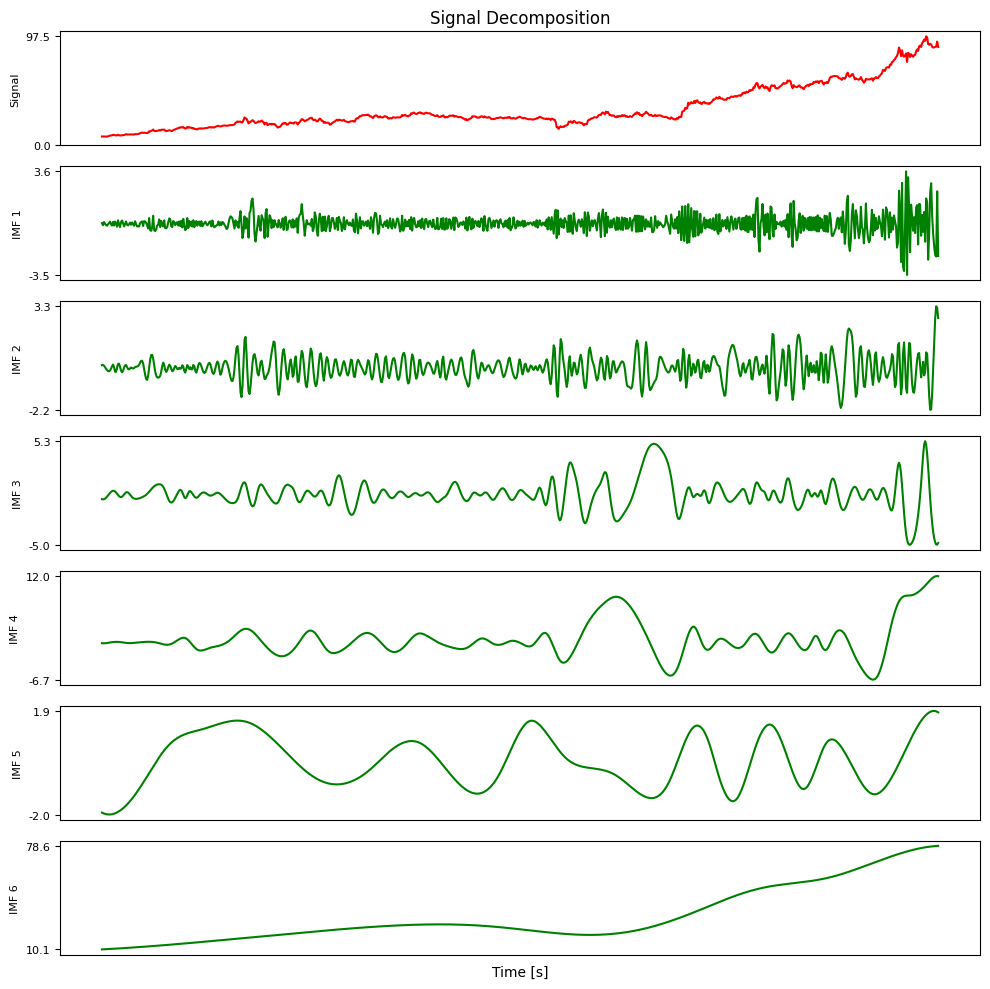

In [1278]:
#import pylab as plt
from matplotlib.ticker import StrMethodFormatter

# Define signal
t = df["Date"].to_numpy()
s = df["Carbon Price"].to_numpy()

# Execute EMD on signal
emd = PyEMD.EMD()
IMF = emd.emd(s,t)
N = IMF.shape[0]+1

font = {'size': 8}


#Plot results
plt.subplot(N,1,1)
plt.rcParams['figure.figsize'] = [10,10]
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.plot(t, s, 'r')
plt.title("Signal Decomposition")
plt.xticks([])
plt.yticks(fontsize = 8)
plt.ylabel("Signal", fontdict=font)
plt.yticks([0, max(s)])
#plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
    plt.xticks([])
    plt.yticks(fontsize = 8)
    plt.ylabel("IMF "+str(n+1), fontdict=font)
    plt.yticks([min(imf), max(imf)])

    
plt.xlabel("Time [s]")
plt.tight_layout()


plt.savefig('simple_example')
plt.show()

In [1279]:
print(IMF.T.shape)

(834, 6)


In [1280]:
imf_df = pd.DataFrame(IMF.T)
imf_df.tail()

,0,1,2,3,4,5
829,-1.552754,1.432403,-4.358141,11.818495,1.926769,78.383228
830,-2.144435,2.646519,-4.775511,11.900852,1.922173,78.440403
831,-2.255571,3.288162,-4.986764,11.950753,1.911874,78.491547
832,2.220828,3.186312,-5.004569,11.965175,1.895618,78.536636
833,-2.218835,2.662819,-4.837434,11.944571,1.873165,78.575714


In [1281]:
train_start = 0
test_start = round(len(s)*3/4)

In [1282]:
df0 = imf_df[[0]]
df1 = imf_df[[1]]
df2 = imf_df[[2]]
df3 = imf_df[[3]]
df4 = imf_df[[4]]
df5 = imf_df[[5]]
#df6 = imf_df[[6]]

# imf1

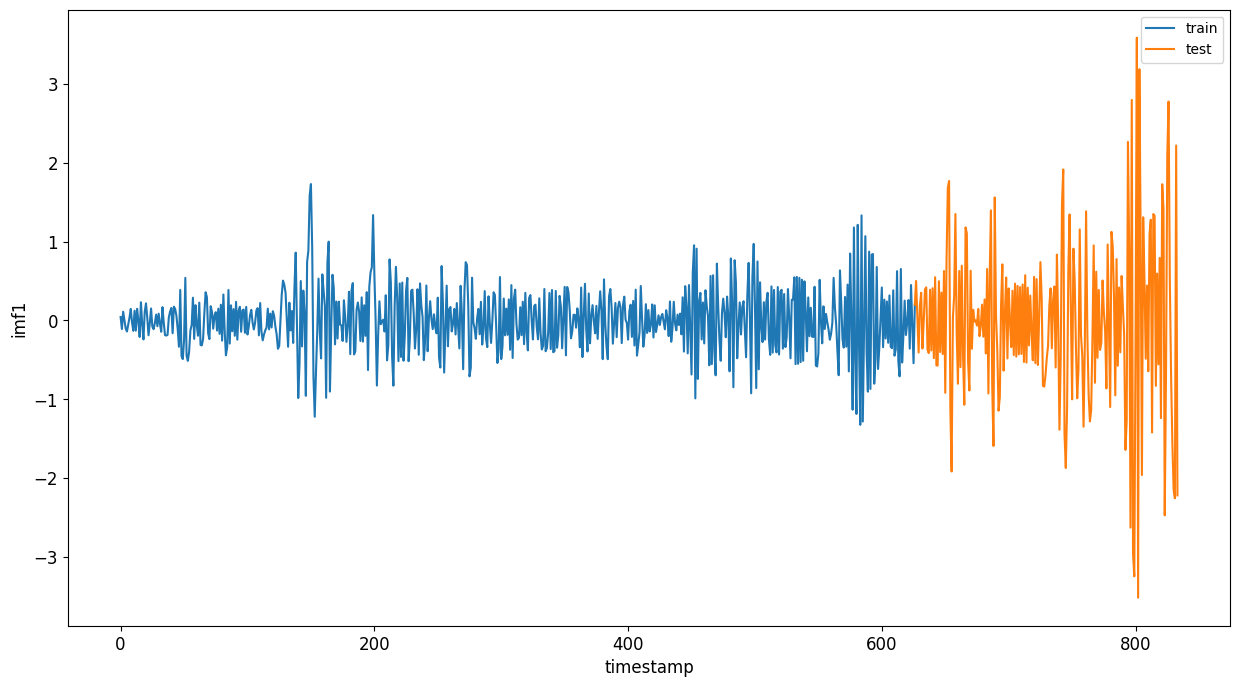

Training data shape:  (626, 1)
Test data shape:  (208, 1)


,0
0,0.447937
1,0.397993
2,0.469743
3,0.435580
4,0.399902
5,0.387728
6,0.416026
7,0.445328
8,0.481448
9,0.424488


In [1283]:

df0[(df0.index <= test_start) & (df0.index >= train_start)][[0]].rename(columns={0:'train'}) \
    .join(df0[test_start:][[0]].rename(columns={0:'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('imf1', fontsize=12)
plt.show()

train = df0.copy()[(df0.index >= train_start) & (df0.index < test_start)][[0]]
test = df0.copy()[df0.index >= test_start][[0]]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train[0] = scaler.fit_transform(train)
train.head(10)

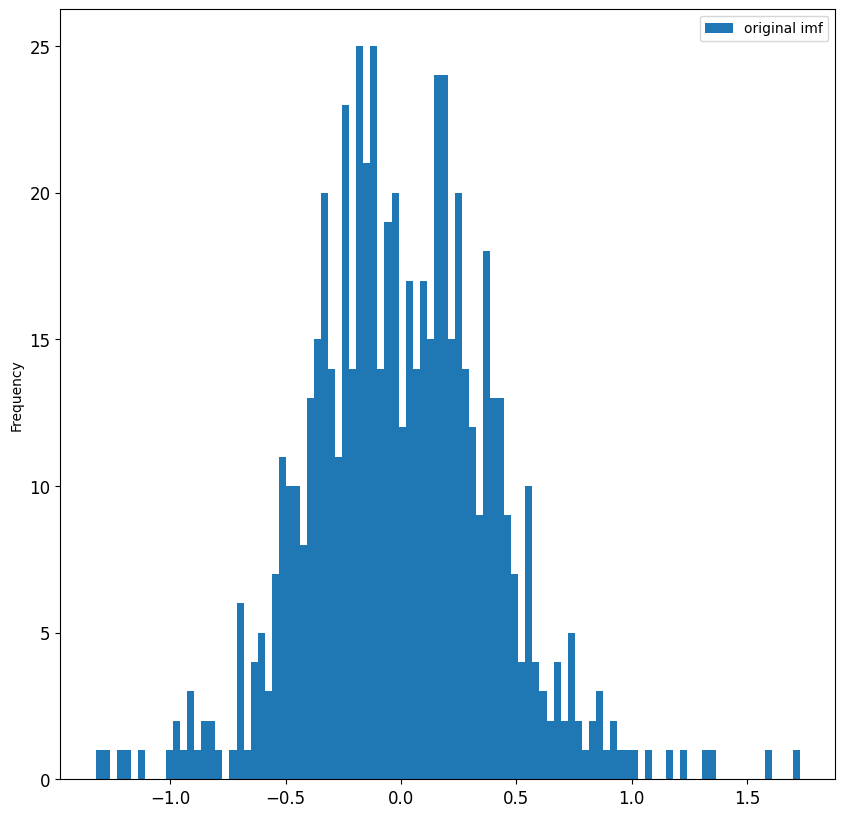

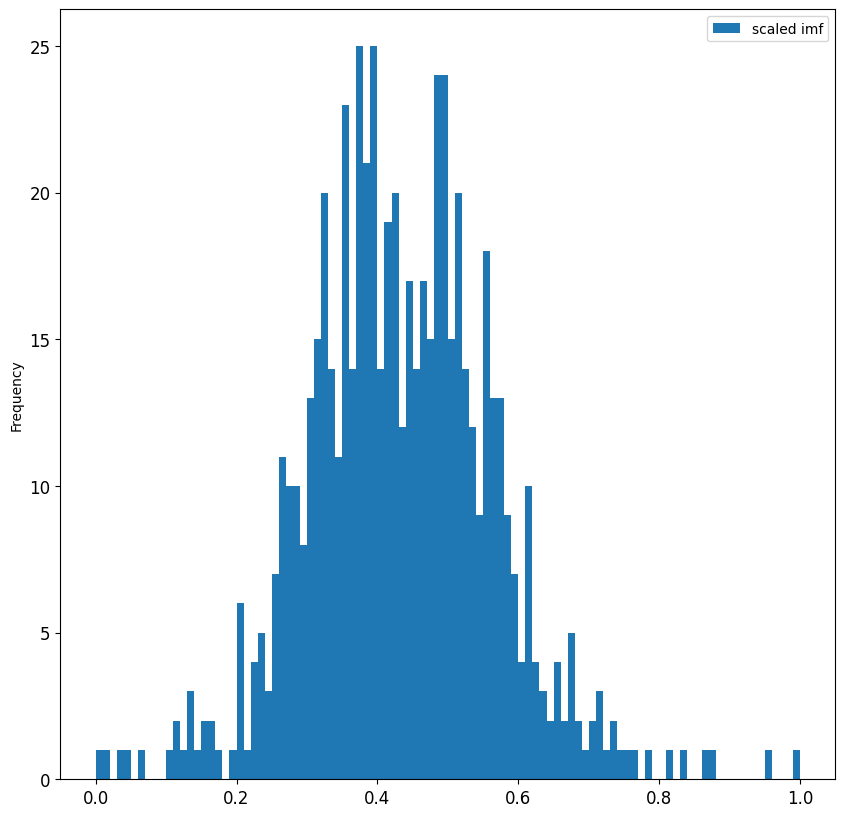

In [1284]:
df0[(df0.index >= train_start) & (df0.index < test_start)][[0]].rename(columns={0:'original imf'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={0:'scaled imf'}).plot.hist(bins=100, fontsize=12)
plt.show()

(624, 2) (624, 1)
(206, 2) (206, 1)
(624, 1) (206, 1)
624 206


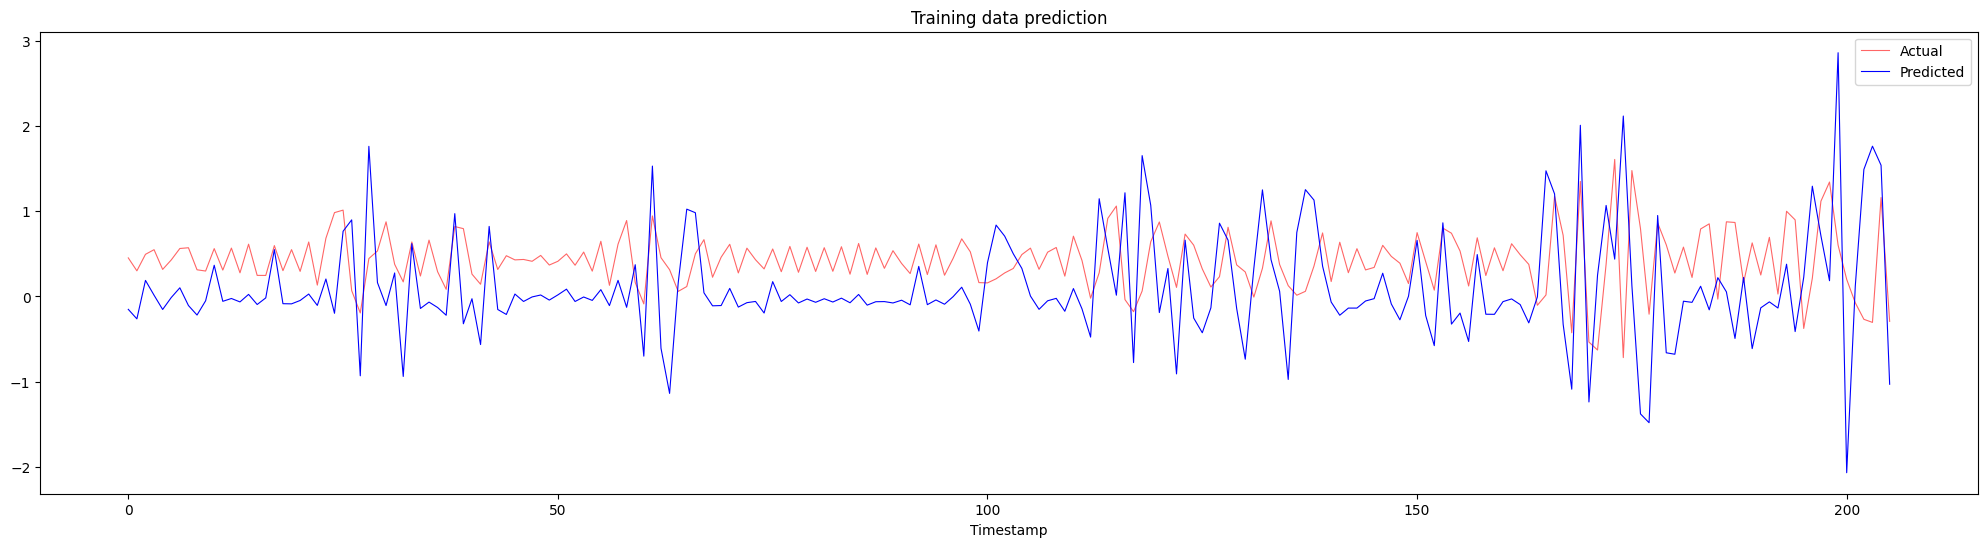

In [1285]:
test[0] = scaler.transform(test)
test.head()

# Specify the number of steps to forecast ahead
timesteps = 3
train_data = train.values
test_data = test.values
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

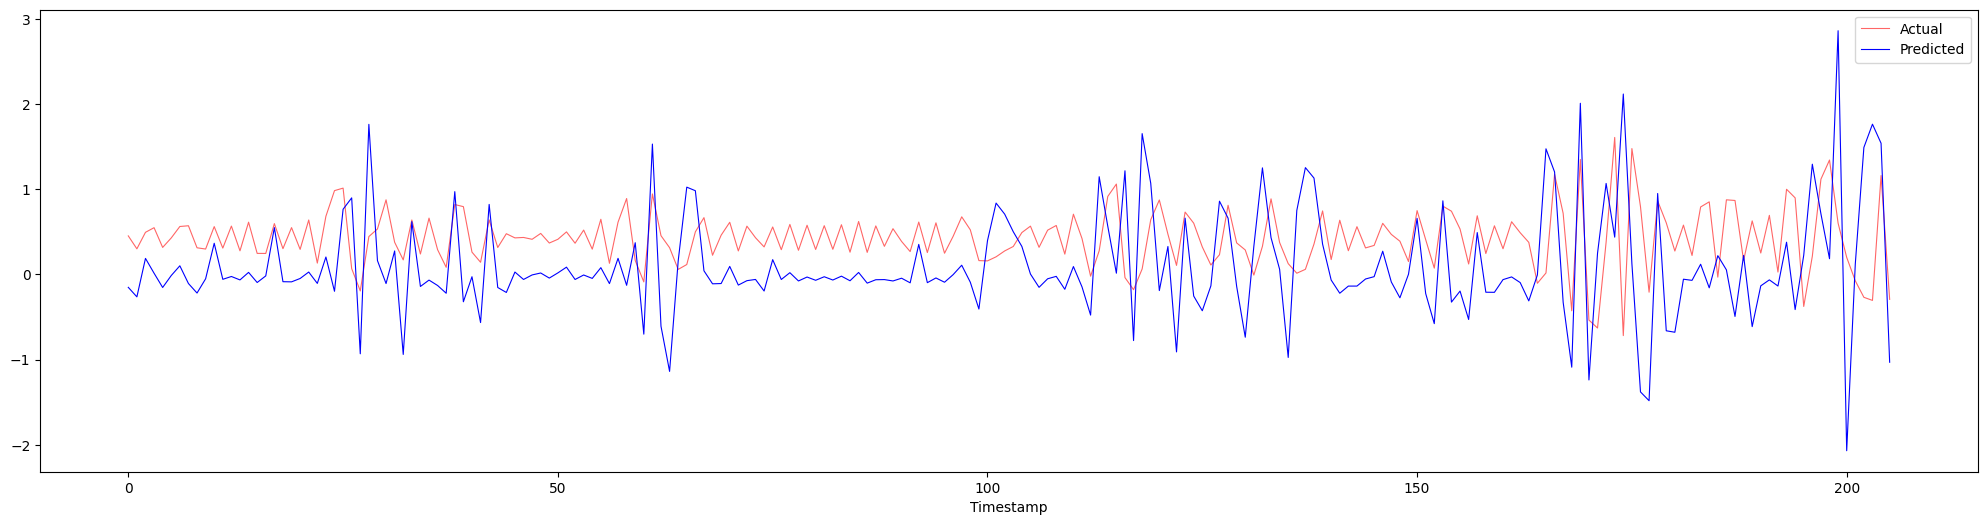

In [1286]:
plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

Tensor shape:  (832, 3)
X shape:  (832, 2) 
Y shape:  (832, 1)


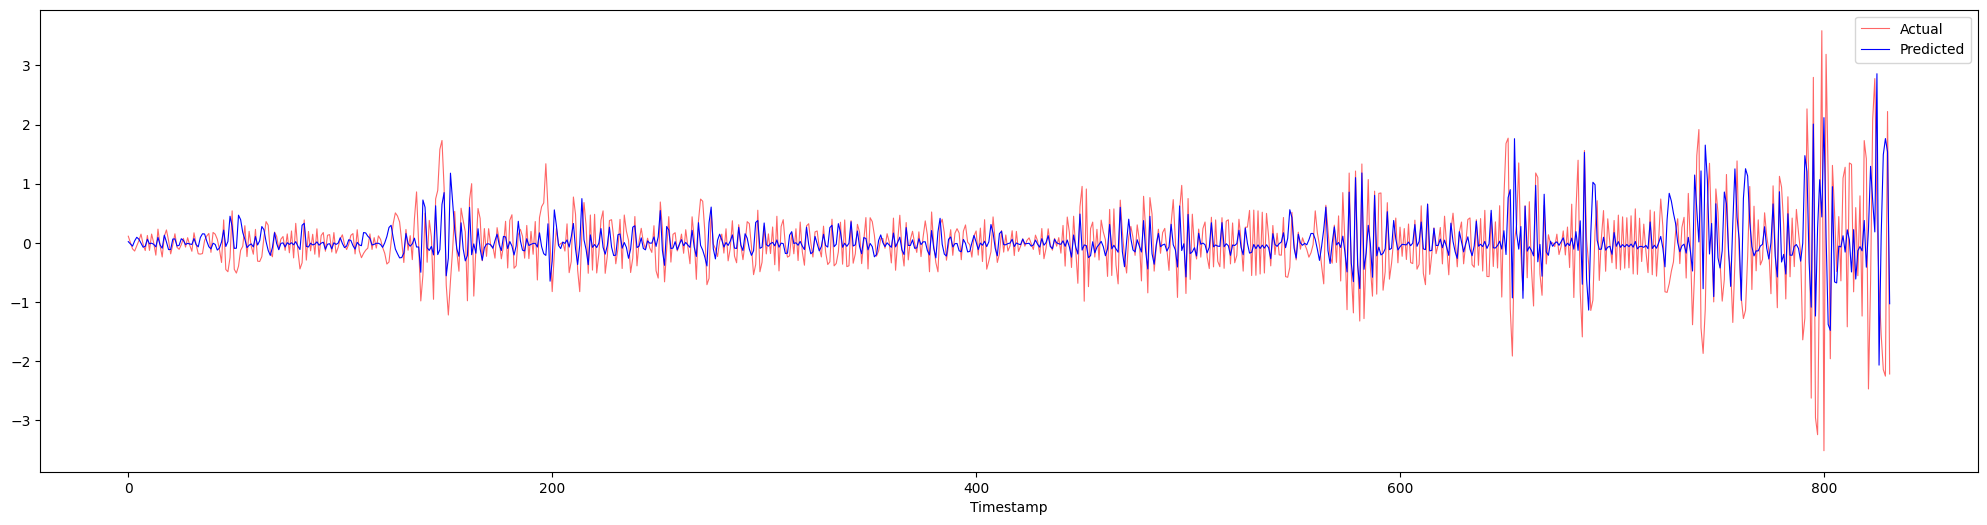

In [1287]:
# Extracting load values as numpy array
data = df0.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(25,6))
plt.plot(Y, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [1288]:
df0 = df0.iloc[2:]
df0["Pred imf1"] = Y_pred

# imf2


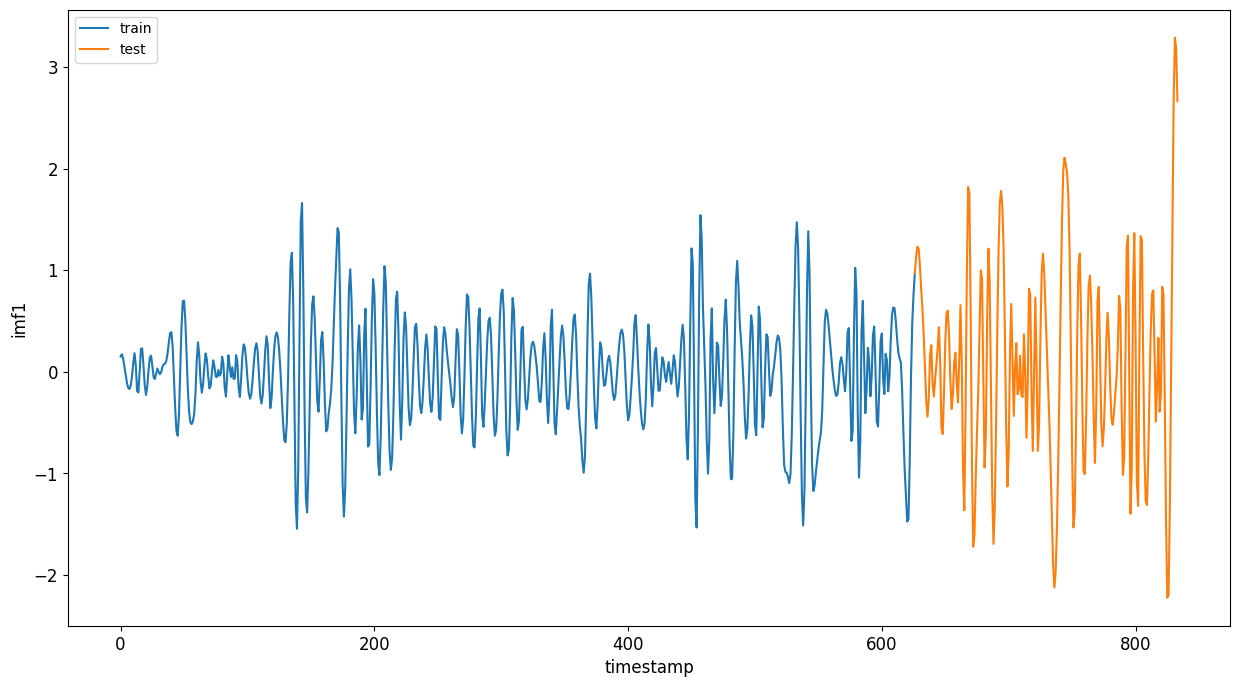

Training data shape:  (626, 1)
Test data shape:  (208, 1)


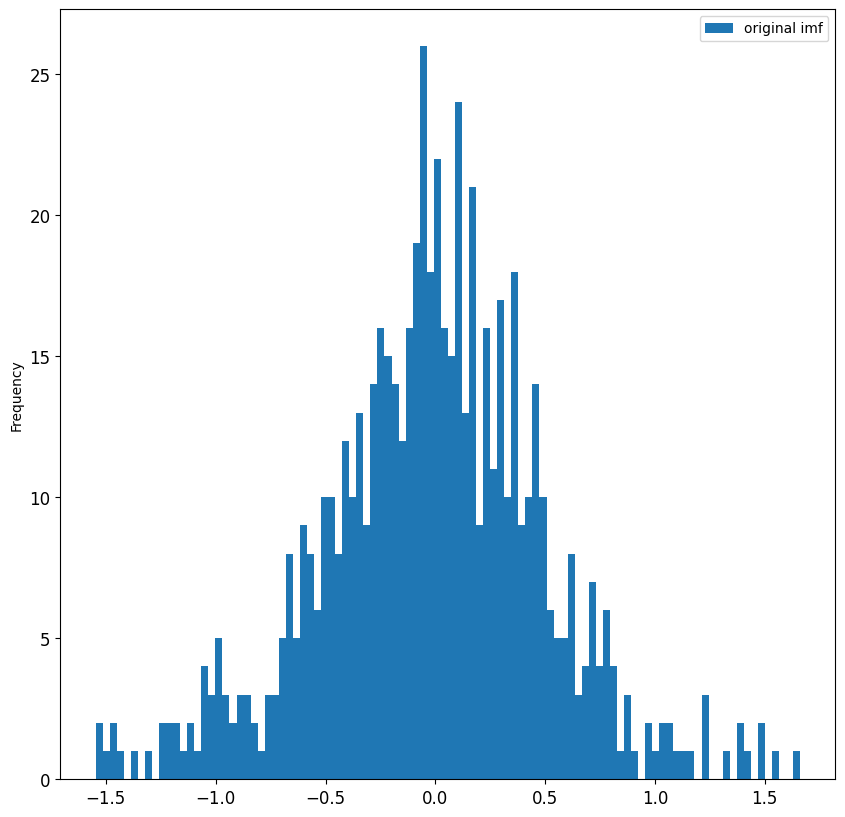

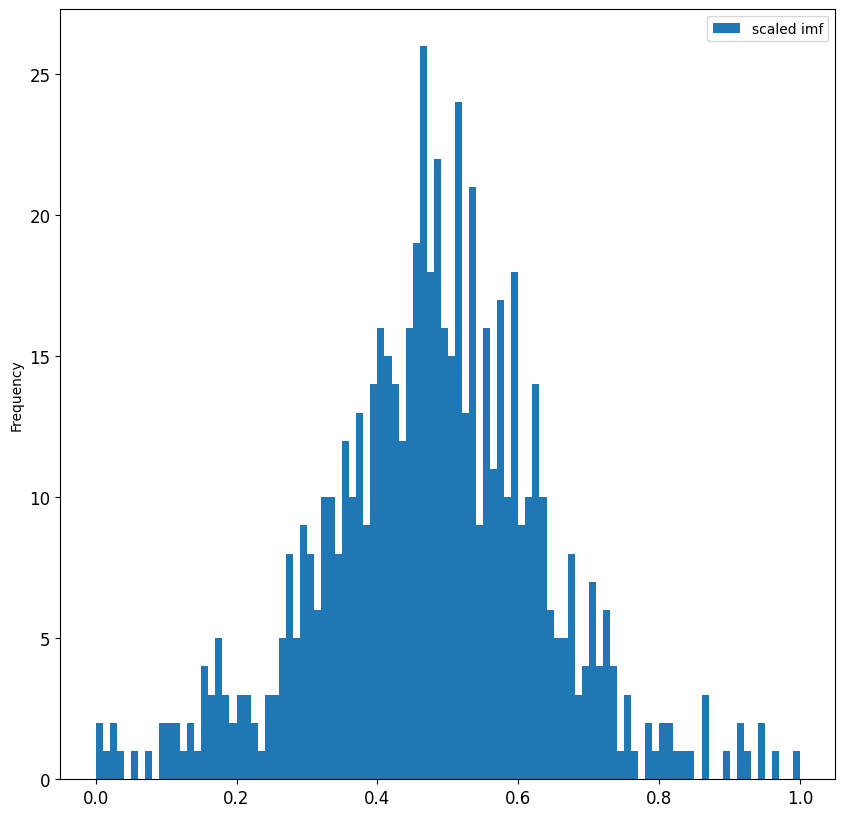

(623, 2) (623, 1)
(206, 2) (206, 1)
(623, 1) (206, 1)
623 206


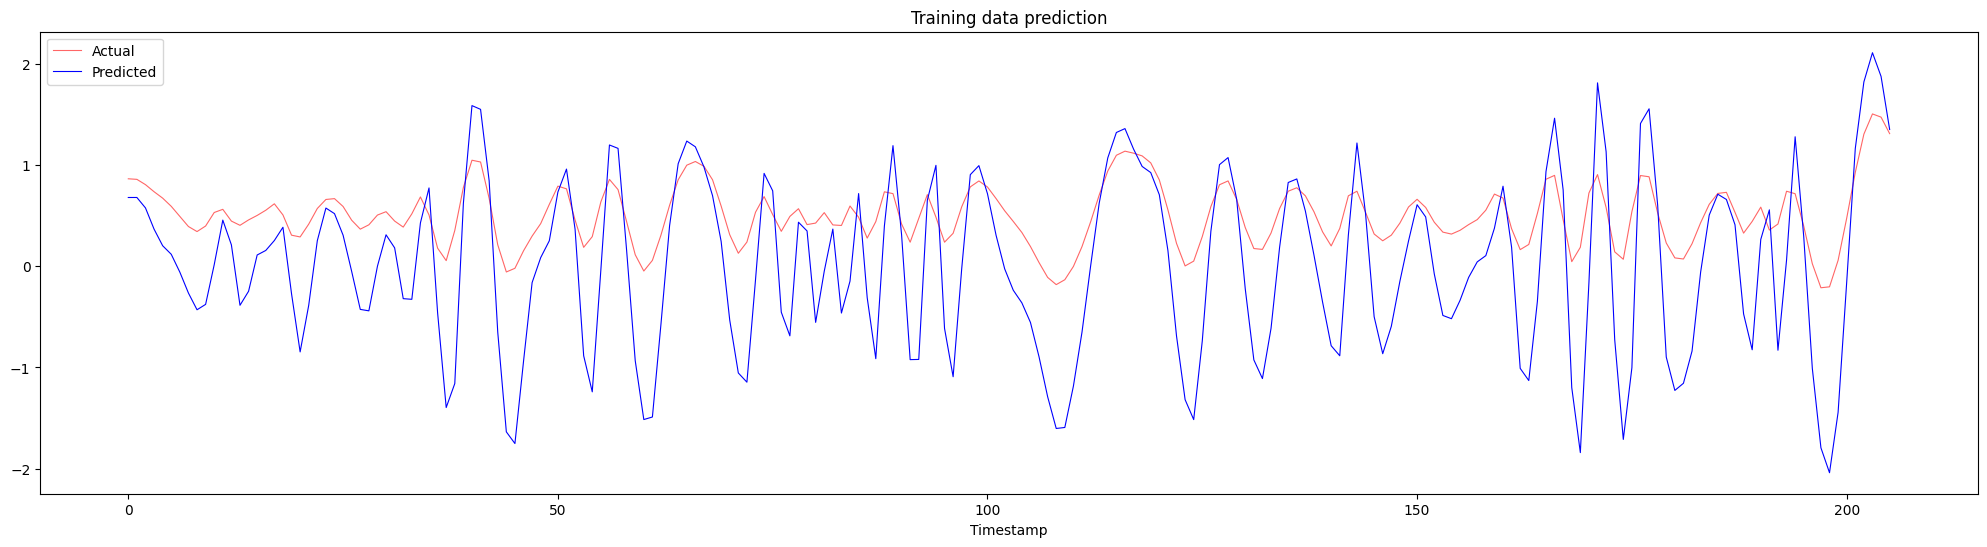

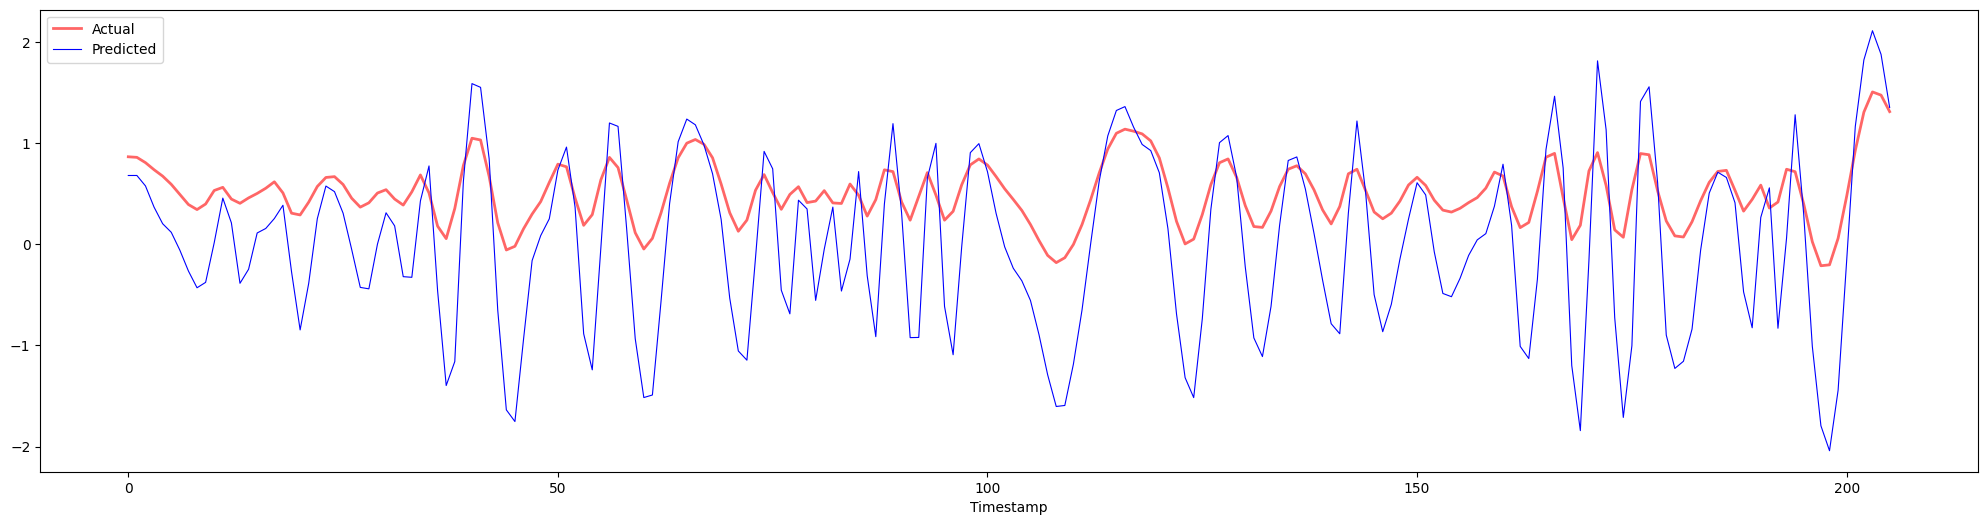

Tensor shape:  (832, 3)
X shape:  (832, 2) 
Y shape:  (832, 1)


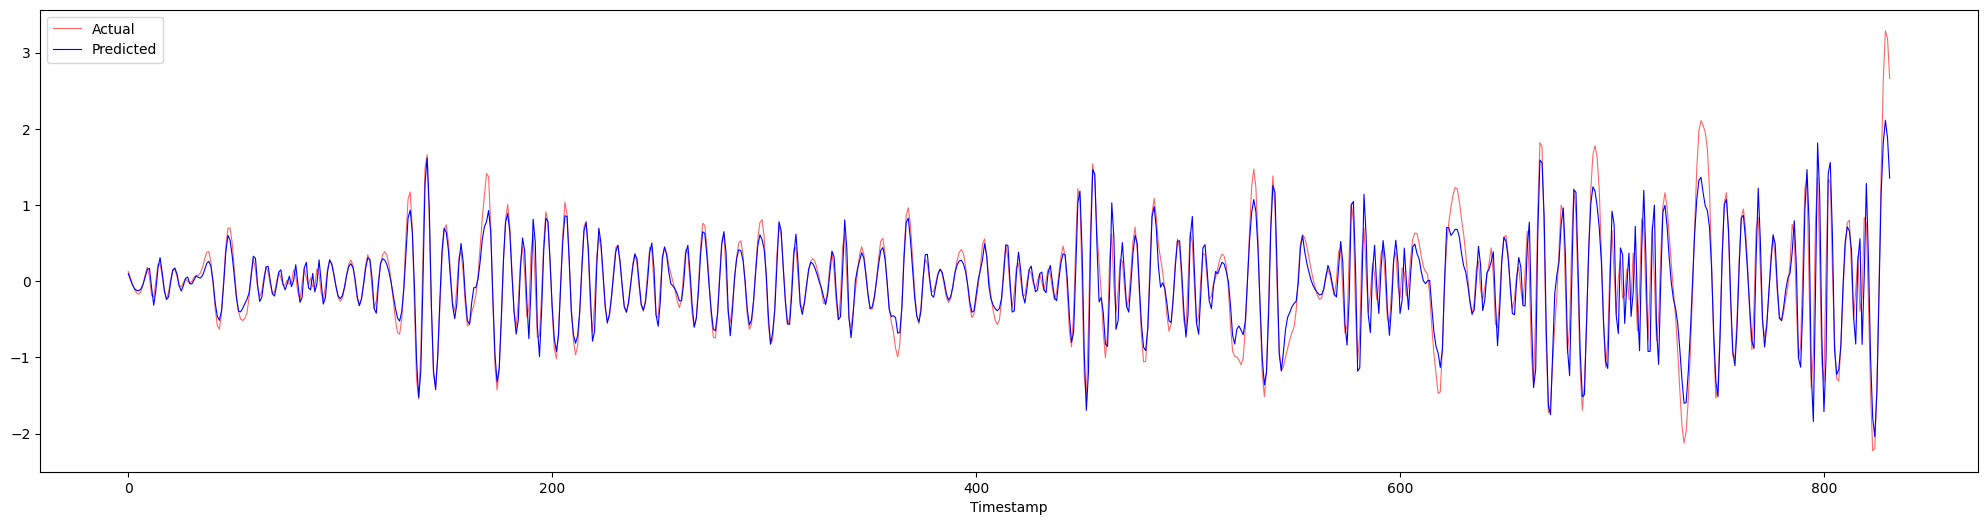

In [1289]:
df1[(df1.index <= test_start) & (df1.index >= train_start)][[1]].rename(columns={1:'train'}) \
    .join(df1[test_start:][[1]].rename(columns={1:'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('imf1', fontsize=12)
plt.show()

train = df1.copy()[(df1.index >= train_start) & (df1.index < test_start)][[1]]
test = df1.copy()[df1.index >= test_start][[1]]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train[1] = scaler.fit_transform(train)
train.head(1)

df1[(df1.index >= train_start) & (df1.index < test_start)][[1]].rename(columns={1:'original imf'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={1:'scaled imf'}).plot.hist(bins=100, fontsize=12)
plt.show()

test[1] = scaler.transform(test)
test.head()

# Specify the number of steps to forecast ahead
timesteps = 3
train_data = train.values
test_data = test.values
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(1,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Extracting load values as numpy array
data = df1.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(25,6))
plt.plot(Y, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

df1 = df1.iloc[2:]
df1["Pred imf2"] = Y_pred

# imf3

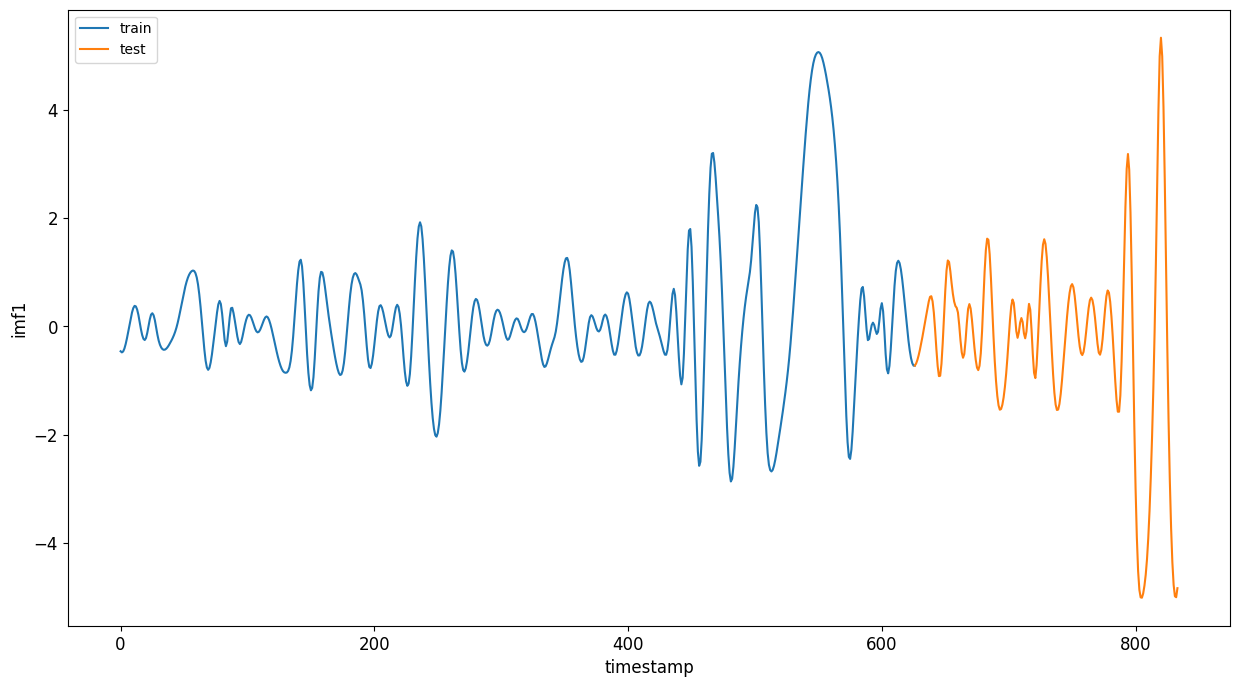

Training data shape:  (626, 1)
Test data shape:  (208, 1)


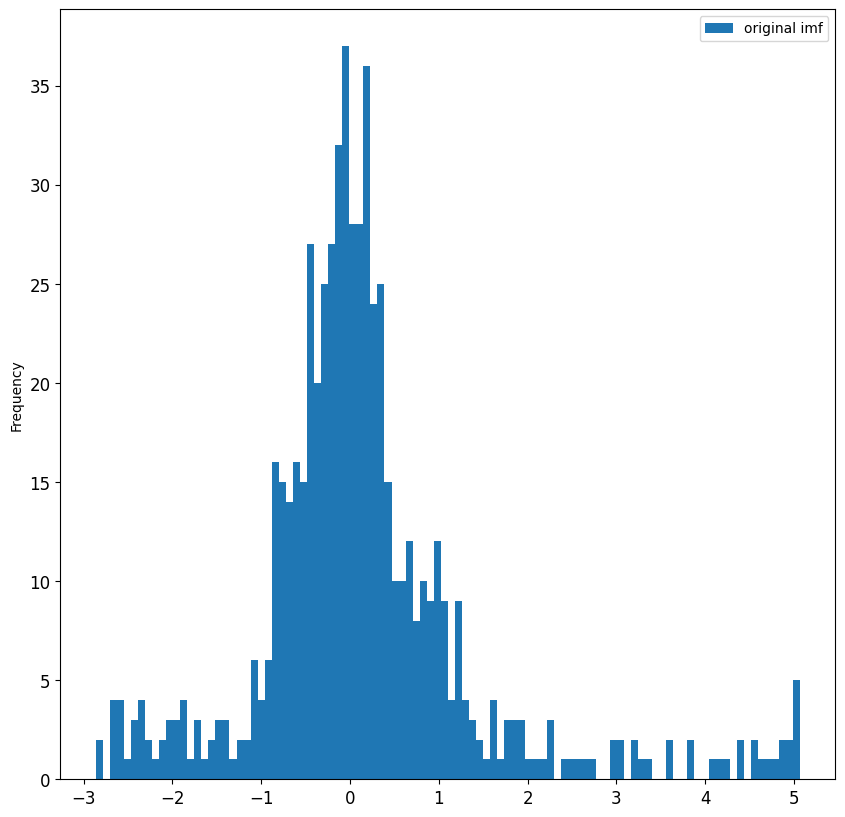

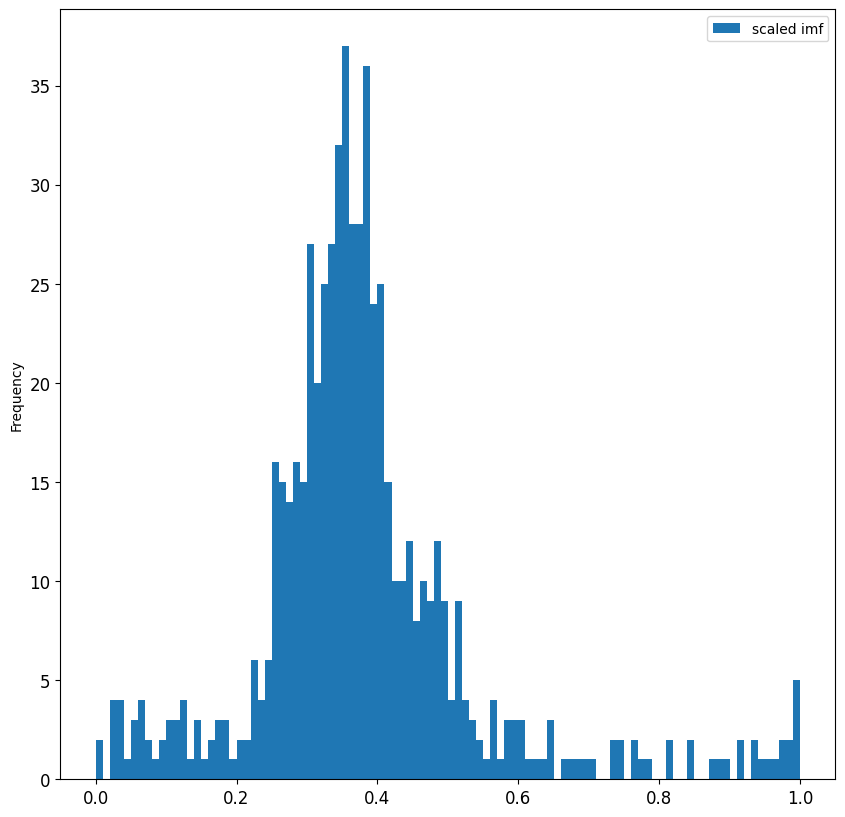

(623, 2) (623, 1)
(206, 2) (206, 1)
(623, 1) (206, 1)
623 206


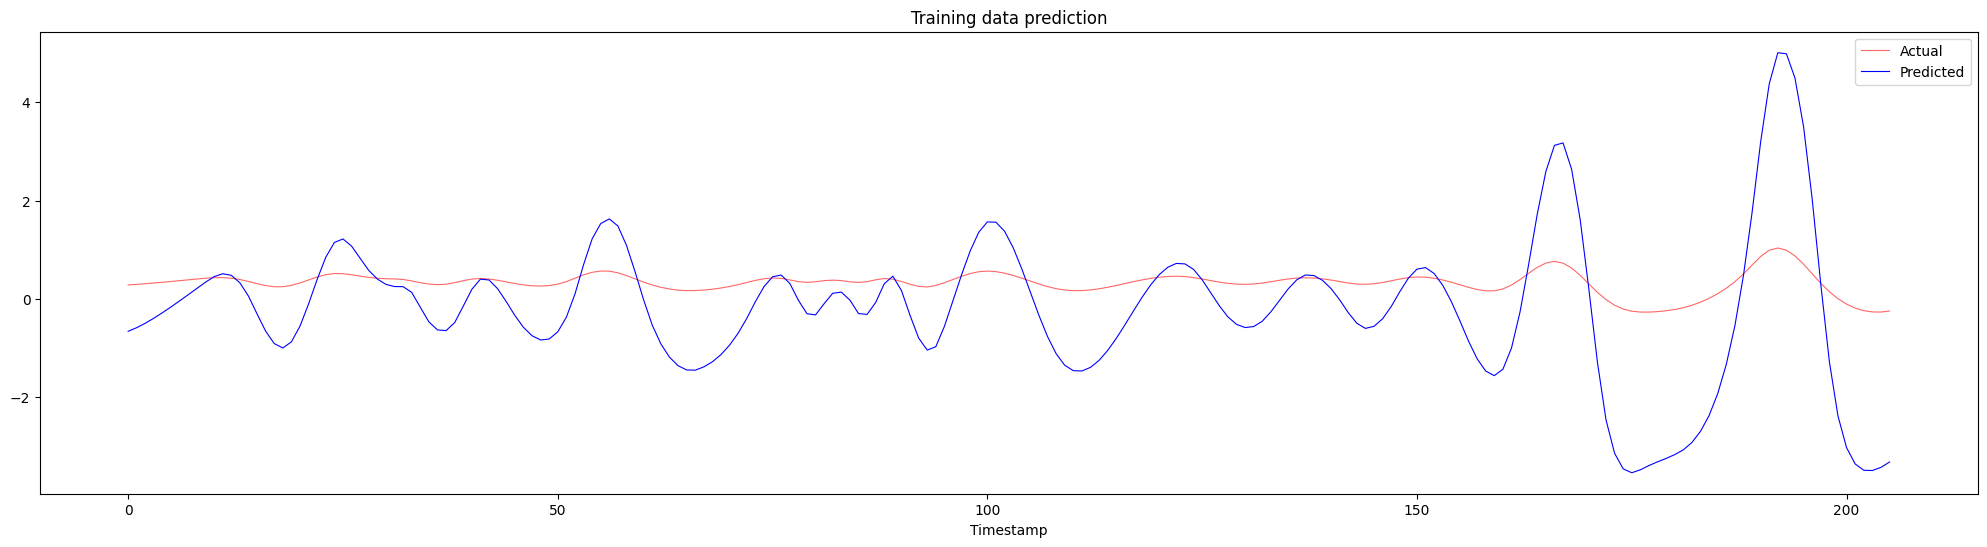

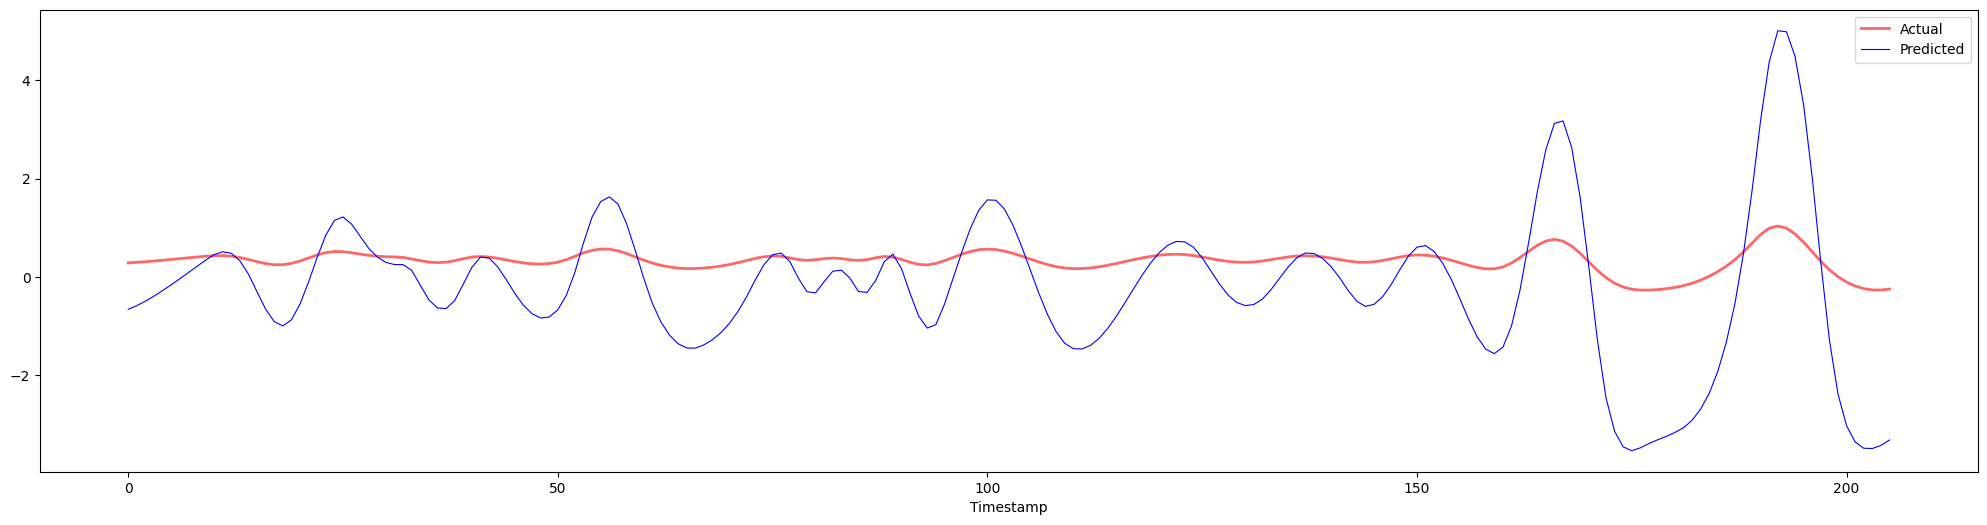

Tensor shape:  (832, 3)
X shape:  (832, 2) 
Y shape:  (832, 1)


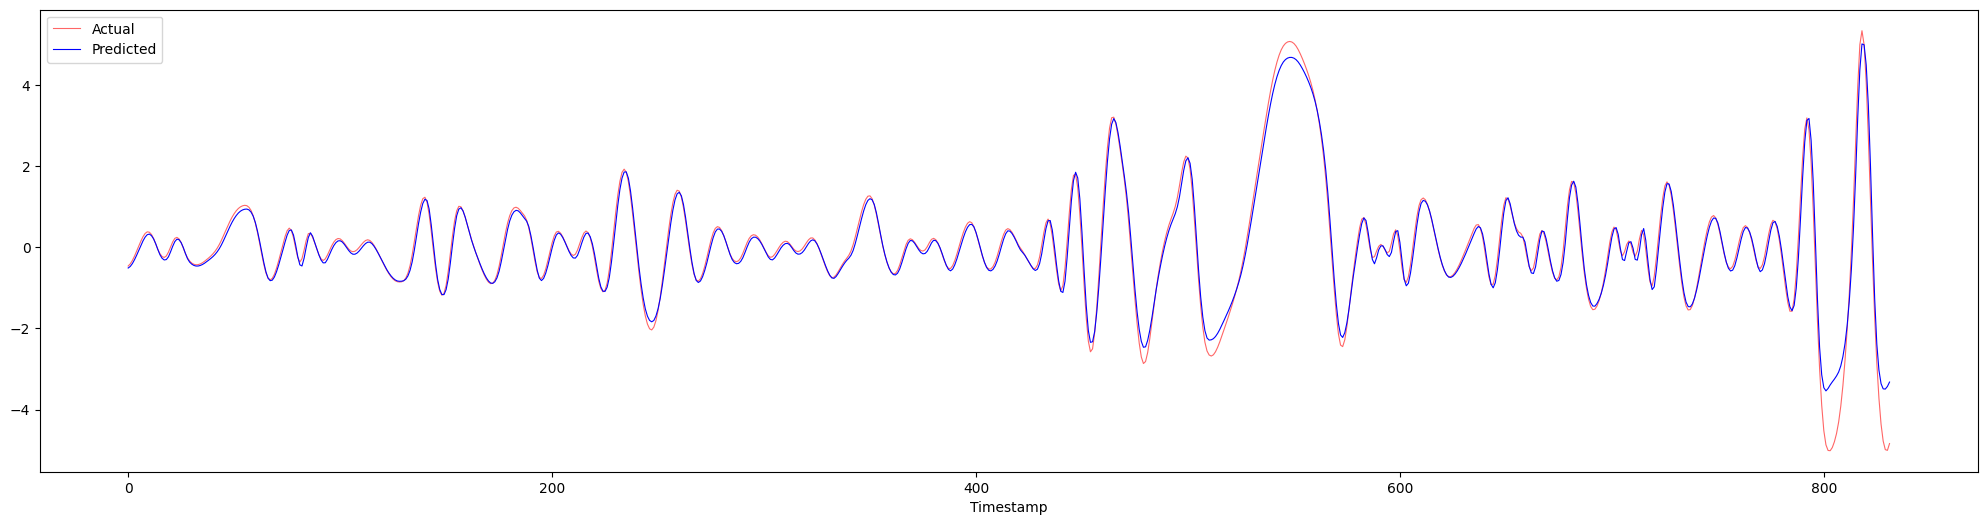

In [1290]:
df2[(df2.index <= test_start) & (df2.index >= train_start)][[2]].rename(columns={2:'train'}) \
    .join(df2[test_start:][[2]].rename(columns={2:'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('imf1', fontsize=12)
plt.show()

train = df2.copy()[(df2.index >= train_start) & (df2.index < test_start)][[2]]
test = df2.copy()[df2.index >= test_start][[2]]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train[2] = scaler.fit_transform(train)
train.head(10)

df2[(df2.index >= train_start) & (df2.index < test_start)][[2]].rename(columns={2:'original imf'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={2:'scaled imf'}).plot.hist(bins=100, fontsize=12)
plt.show()

test[2] = scaler.transform(test)
test.head()

# Specify the number of steps to forecast ahead
timesteps = 3
train_data = train.values
test_data = test.values
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(1,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Extracting load values as numpy array
data = df2.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(25,6))
plt.plot(Y, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

df2 = df2.iloc[2:]
df2["Pred imf3"] = Y_pred

# imf4

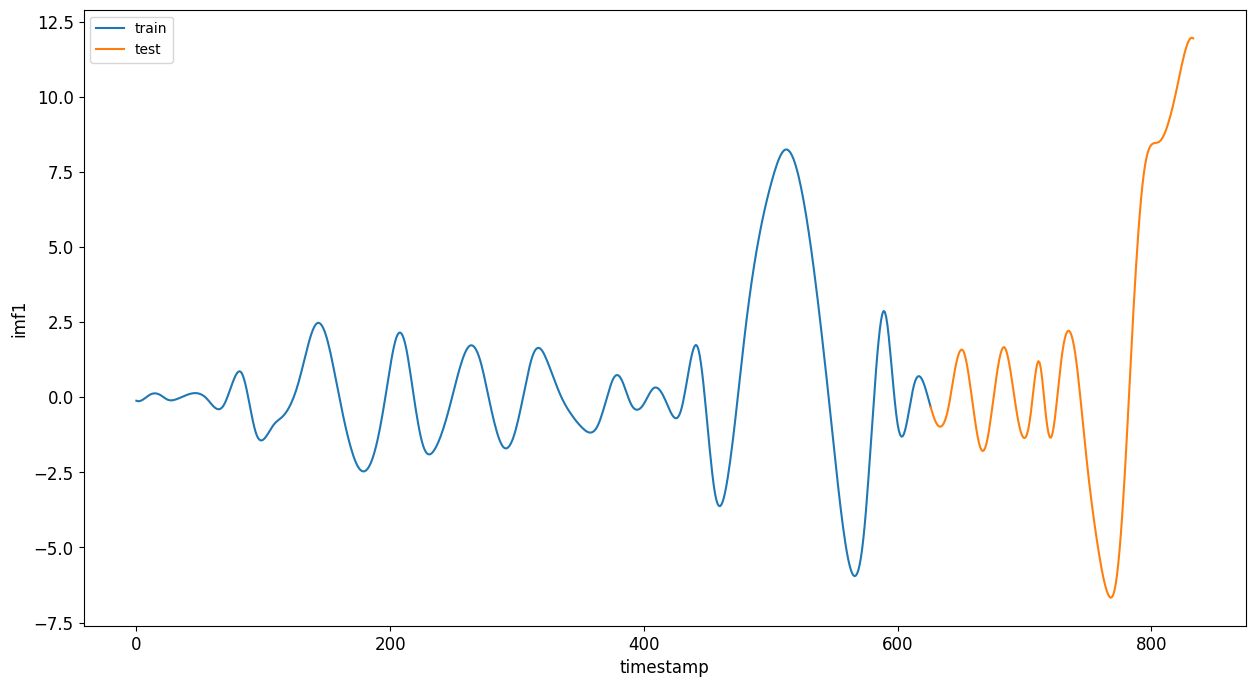

Training data shape:  (626, 1)
Test data shape:  (208, 1)


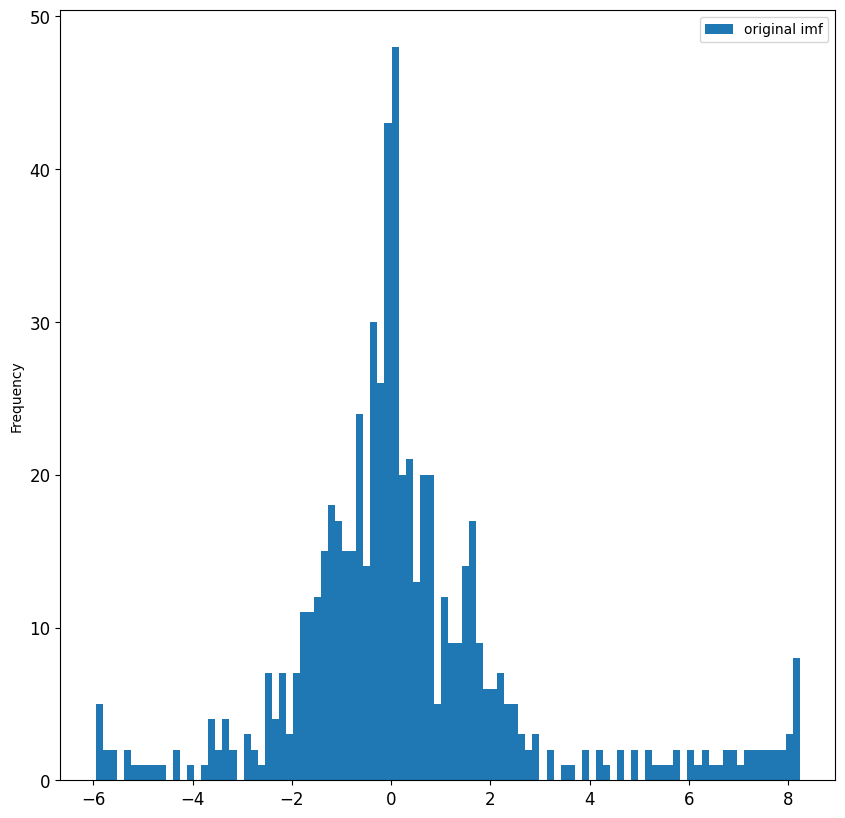

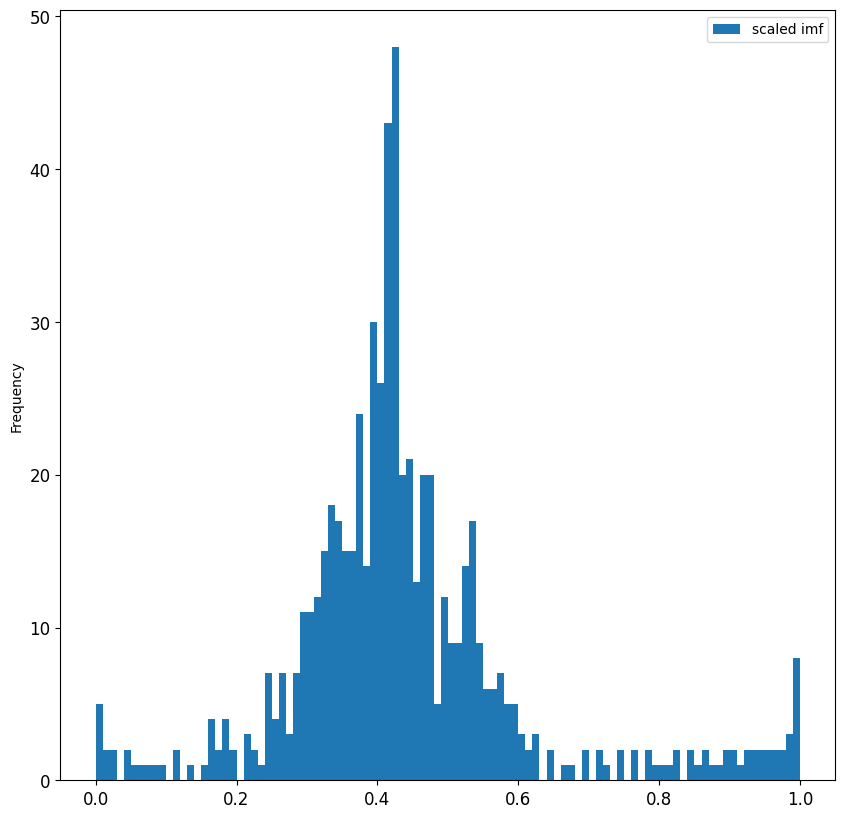

(623, 2) (623, 1)
(206, 2) (206, 1)
(623, 1) (206, 1)
623 206


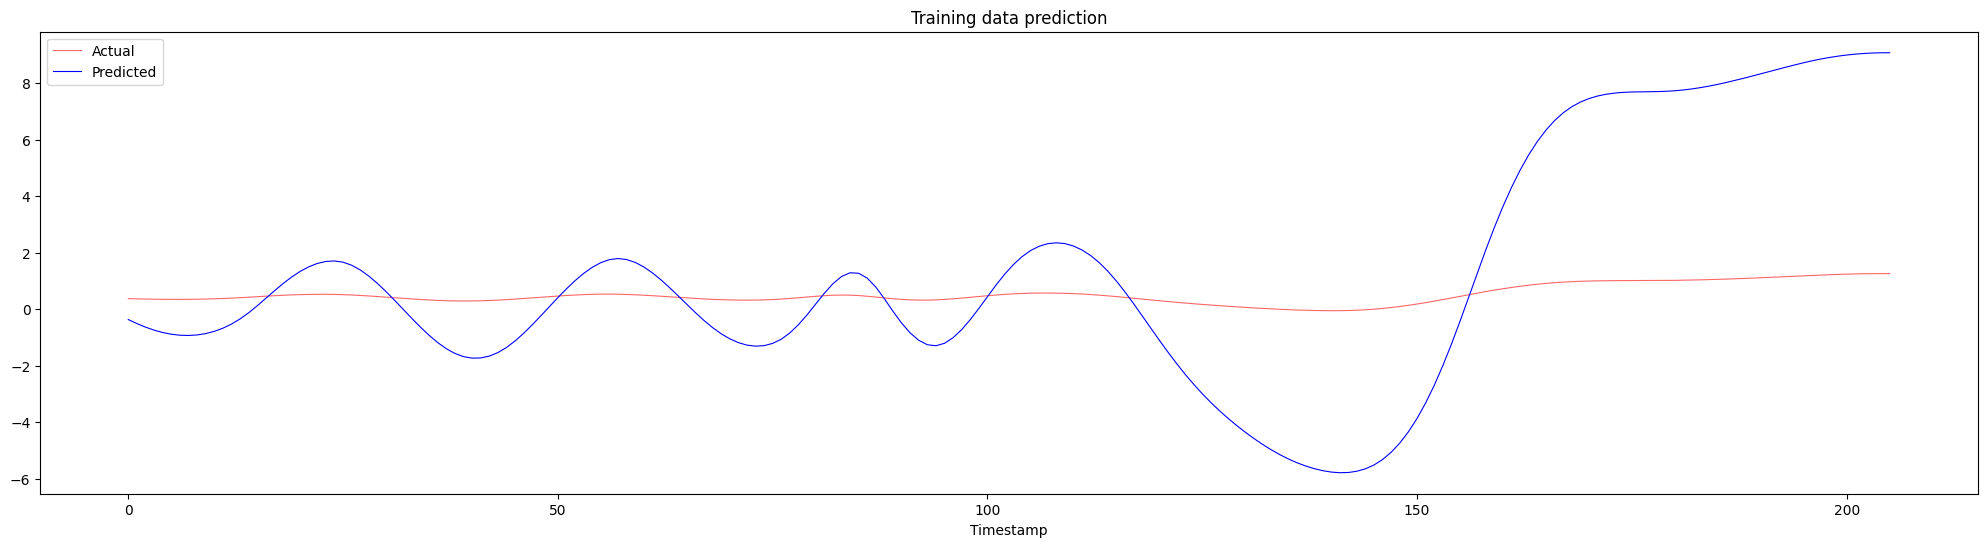

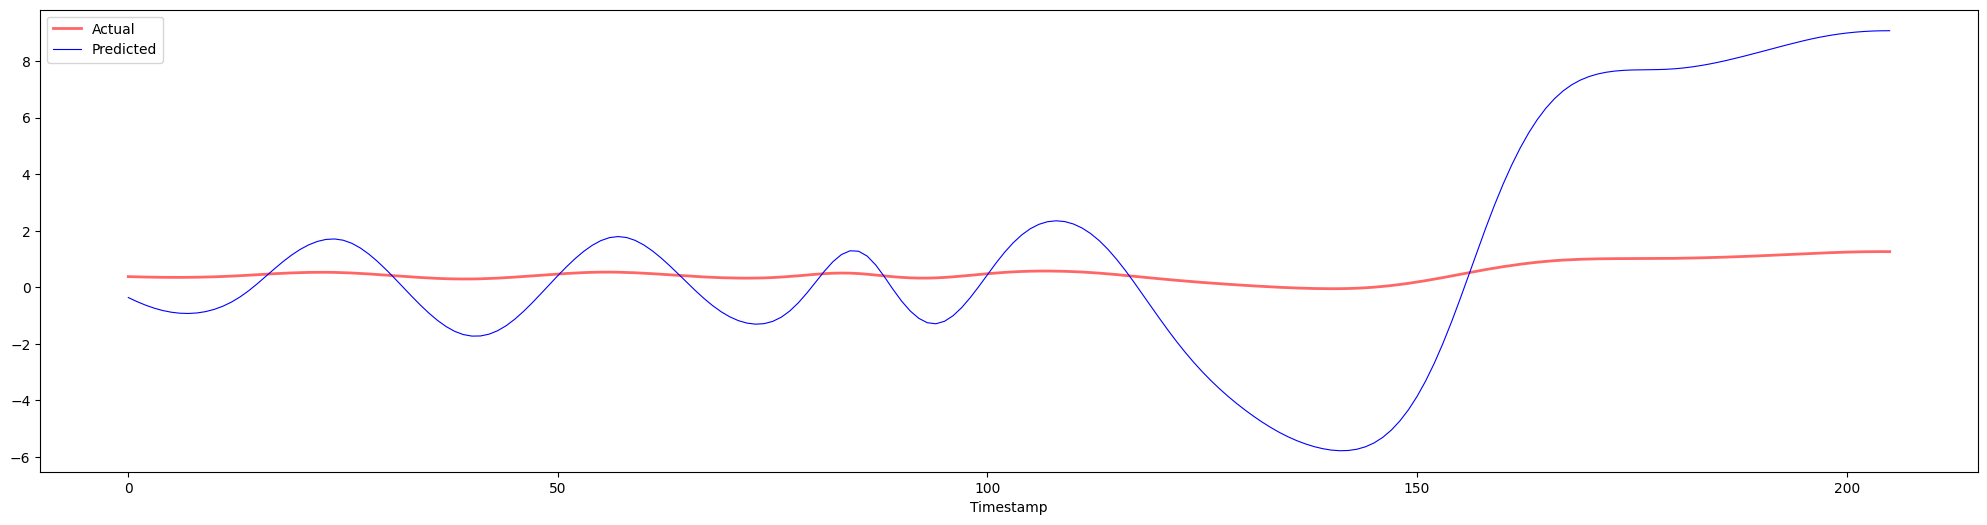

Tensor shape:  (832, 3)
X shape:  (832, 2) 
Y shape:  (832, 1)


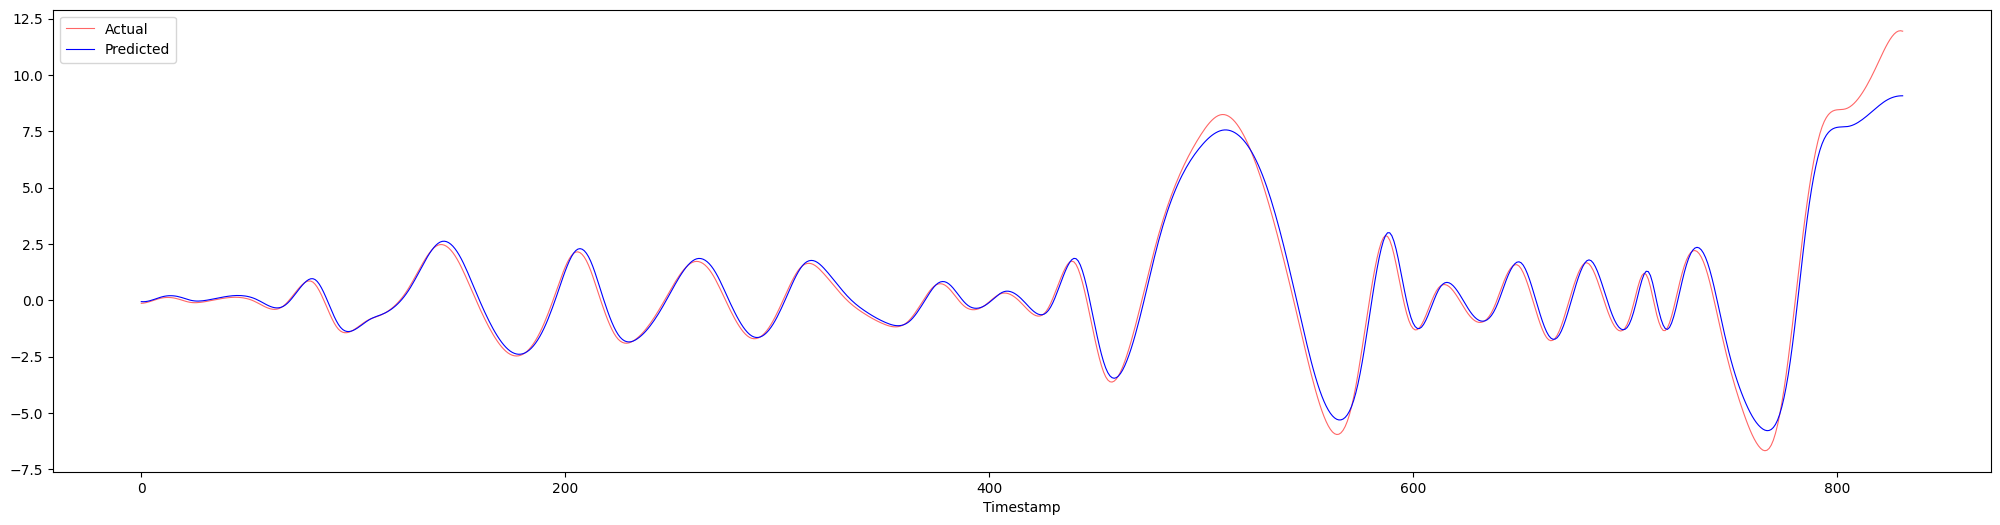

In [1291]:
df3[(df3.index <= test_start) & (df3.index >= train_start)][[3]].rename(columns={3:'train'}) \
    .join(df3[test_start:][[3]].rename(columns={3:'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('imf1', fontsize=12)
plt.show()

train = df3.copy()[(df3.index >= train_start) & (df3.index < test_start)][[3]]
test = df3.copy()[df3.index >= test_start][[3]]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train[3] = scaler.fit_transform(train)
train.head(1)

df3[(df3.index >= train_start) & (df3.index < test_start)][[3]].rename(columns={3:'original imf'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={3:'scaled imf'}).plot.hist(bins=100, fontsize=12)
plt.show()

test[3] = scaler.transform(test)
test.head()

# Specify the number of steps to forecast ahead
timesteps = 3
train_data = train.values
test_data = test.values
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(1,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Extracting load values as numpy array
data = df3.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(25,6))
plt.plot(Y, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

df3 = df3.iloc[2:]
df3["Pred imf4"] = Y_pred

# imf5

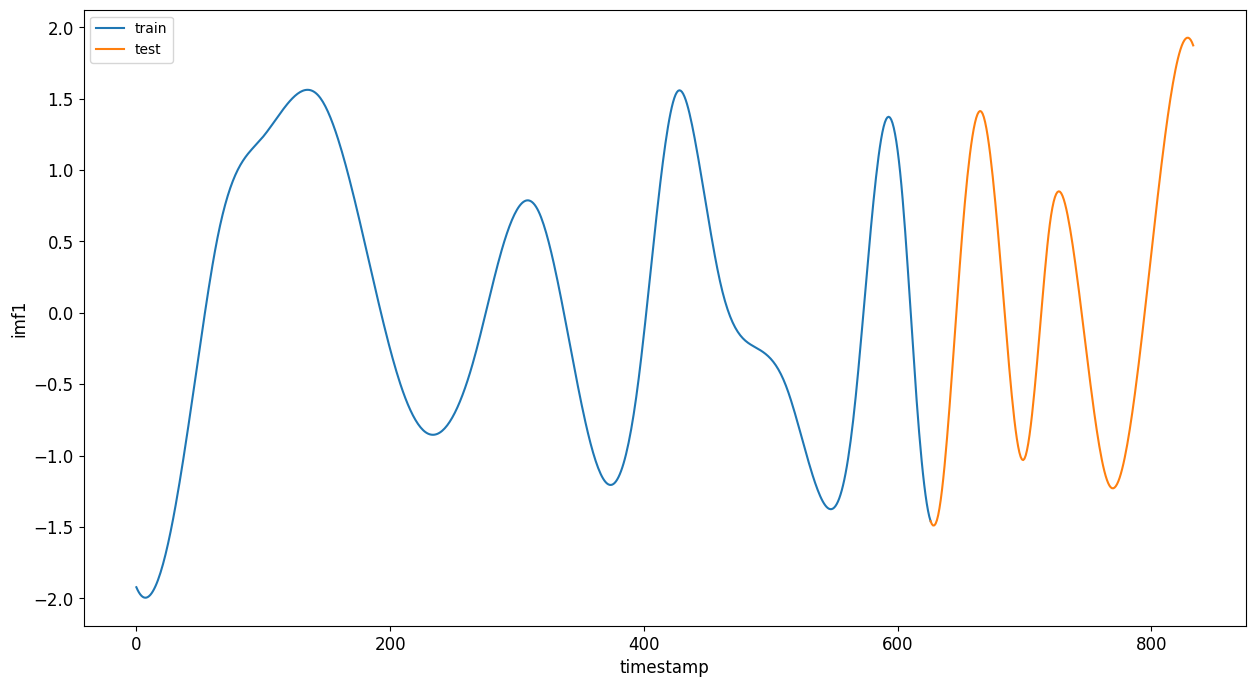

Training data shape:  (626, 1)
Test data shape:  (208, 1)


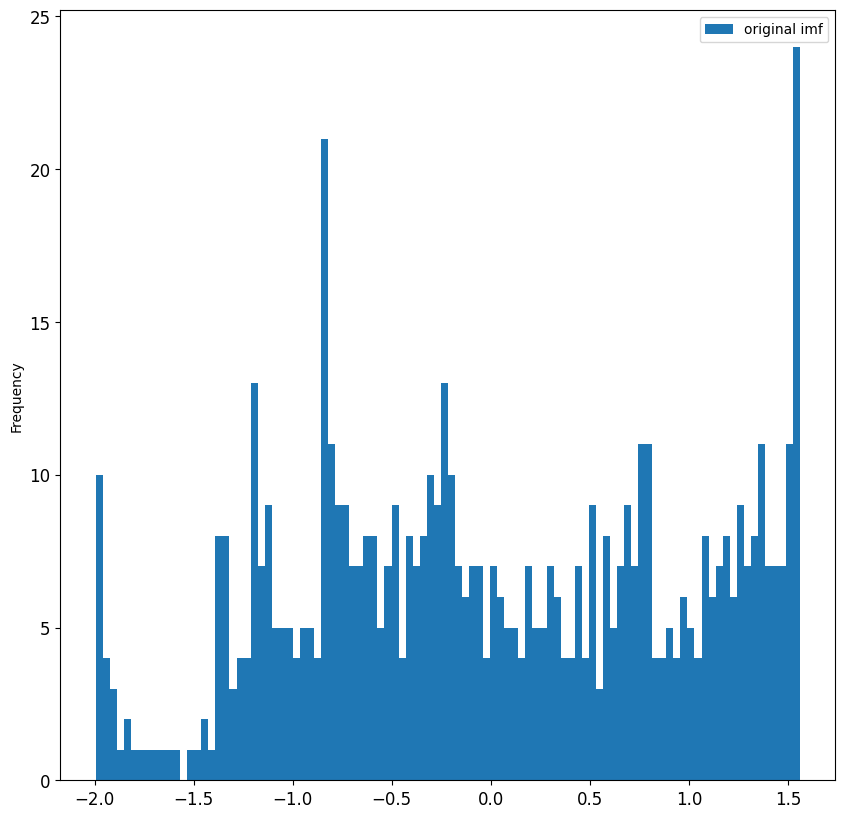

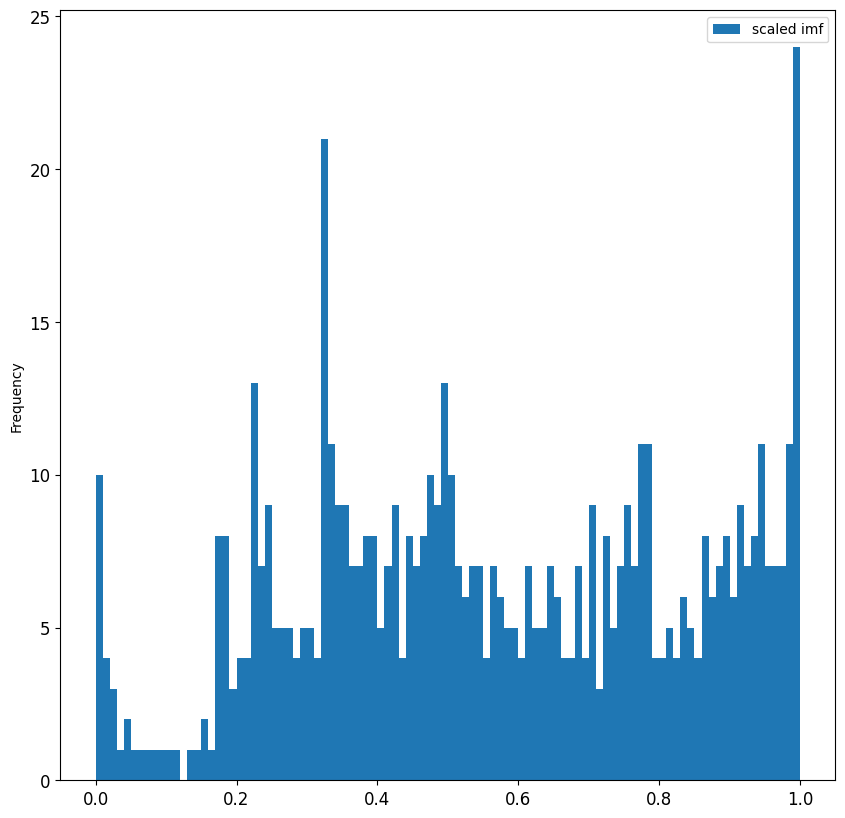

(623, 2) (623, 1)
(206, 2) (206, 1)
(623, 1) (206, 1)
623 206


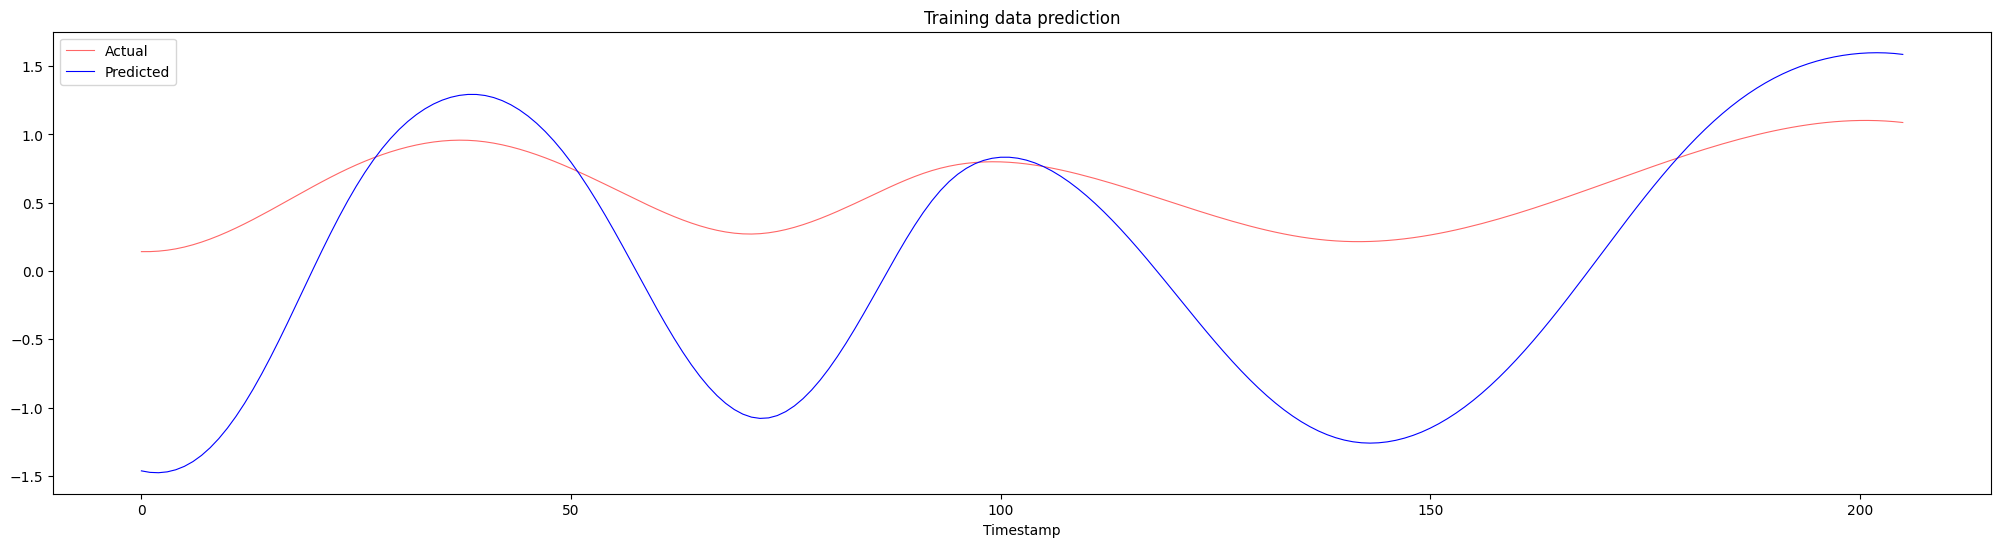

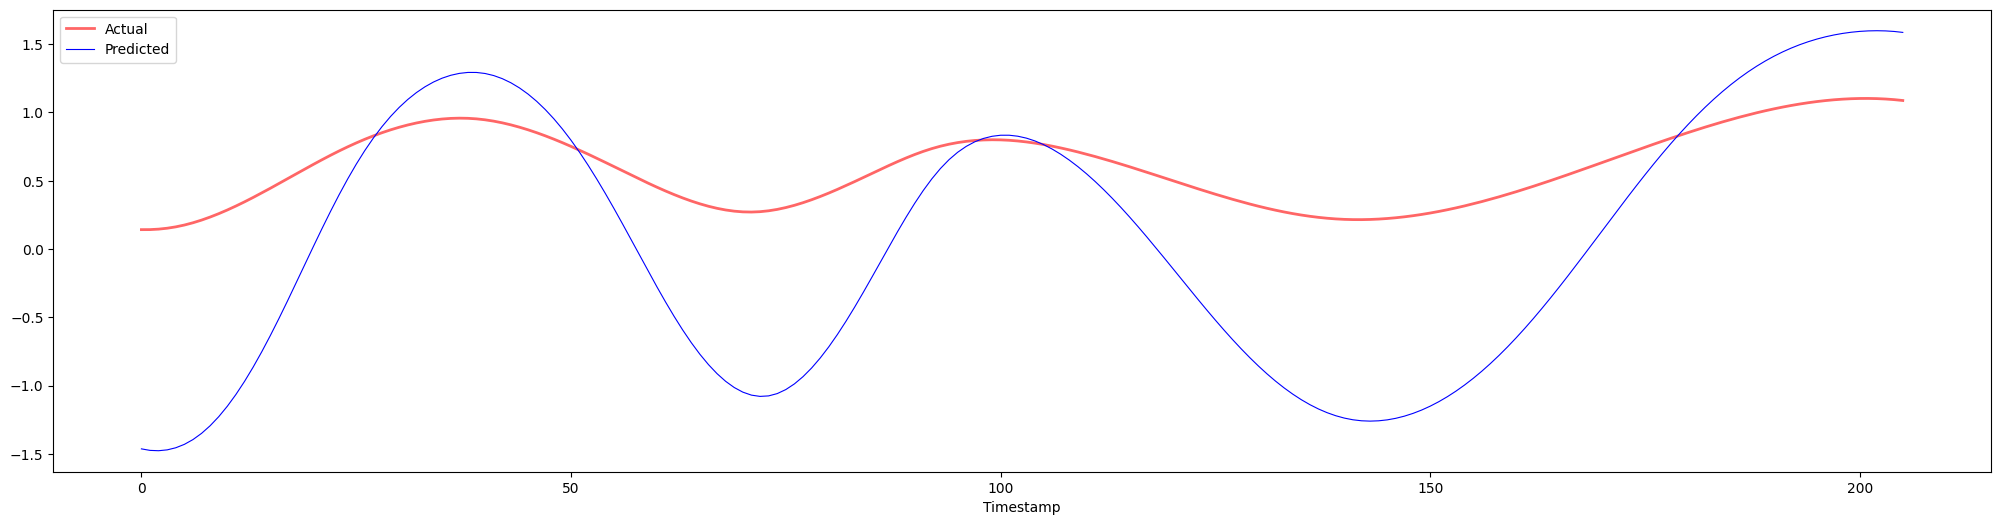

Tensor shape:  (832, 3)
X shape:  (832, 2) 
Y shape:  (832, 1)


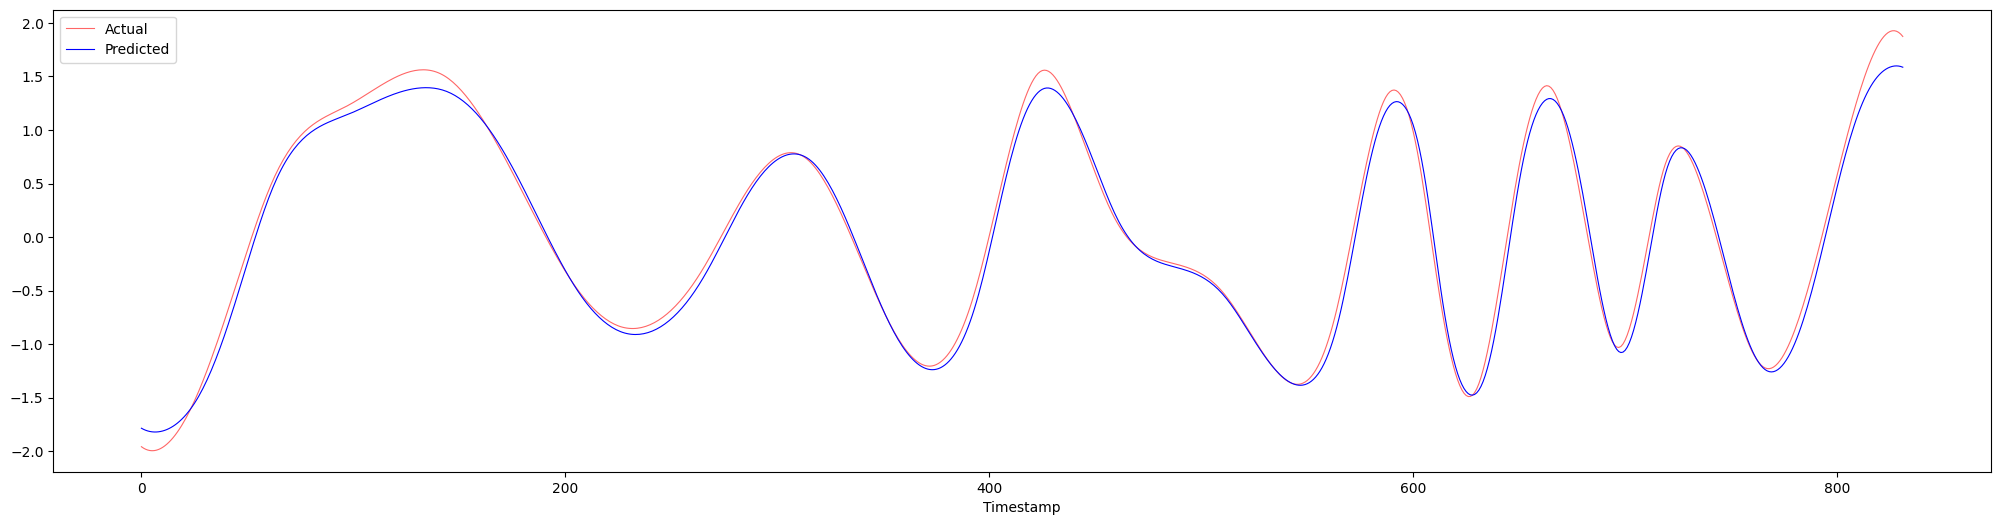

In [1292]:
df4[(df4.index <= test_start) & (df4.index >= train_start)][[4]].rename(columns={4:'train'}) \
    .join(df4[test_start:][[4]].rename(columns={4:'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('imf1', fontsize=12)
plt.show()

train = df4.copy()[(df4.index >= train_start) & (df4.index < test_start)][[4]]
test = df4.copy()[df4.index >= test_start][[4]]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train[4] = scaler.fit_transform(train)
train.head(1)

df4[(df4.index >= train_start) & (df4.index < test_start)][[4]].rename(columns={4:'original imf'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={4:'scaled imf'}).plot.hist(bins=100, fontsize=12)
plt.show()

test[4] = scaler.transform(test)
test.head()

# Specify the number of steps to forecast ahead
timesteps = 3
train_data = train.values
test_data = test.values
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(1,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Extracting load values as numpy array
data = df4.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(25,6))
plt.plot(Y, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

df4 = df4.iloc[2:]
df4["Pred imf5"] = Y_pred

# imf6

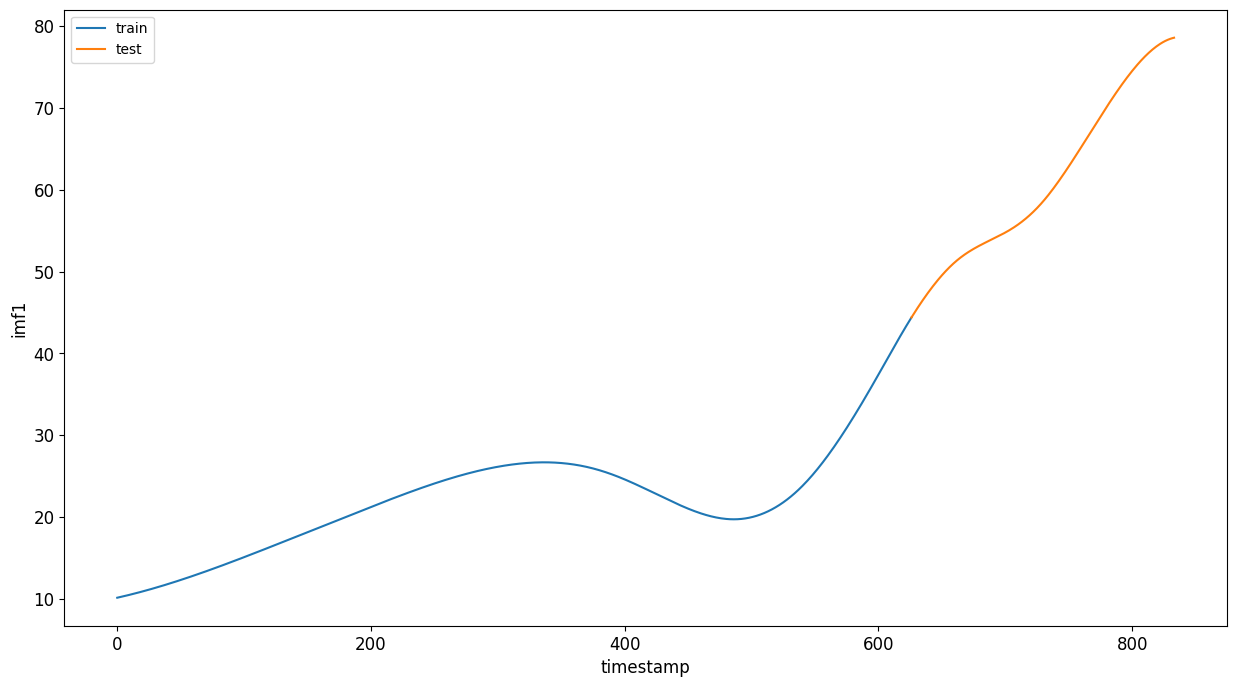

Training data shape:  (626, 1)
Test data shape:  (208, 1)


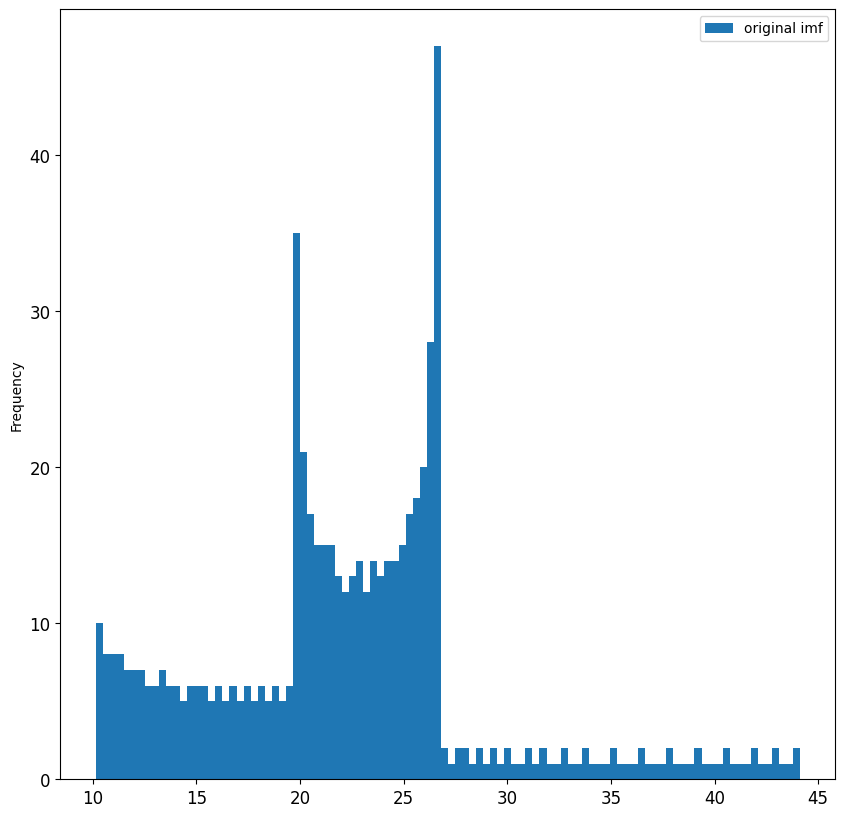

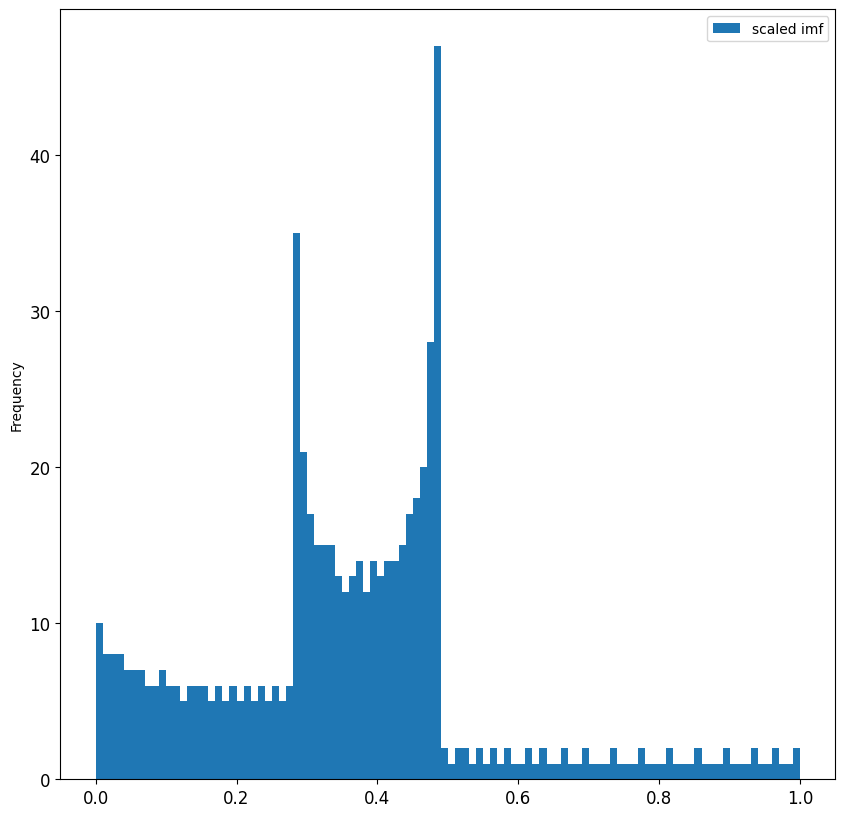

(623, 2) (623, 1)
(206, 2) (206, 1)
(623, 1) (206, 1)
623 206


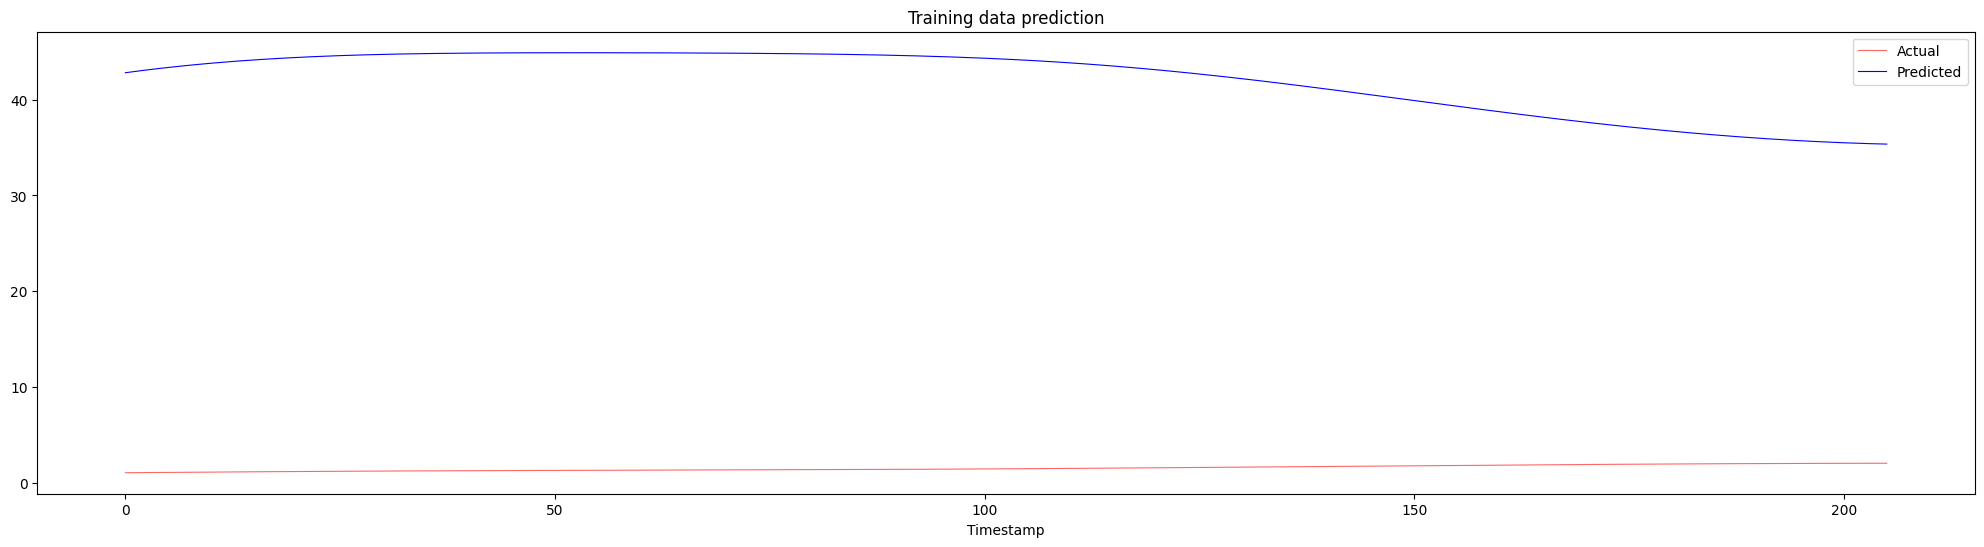

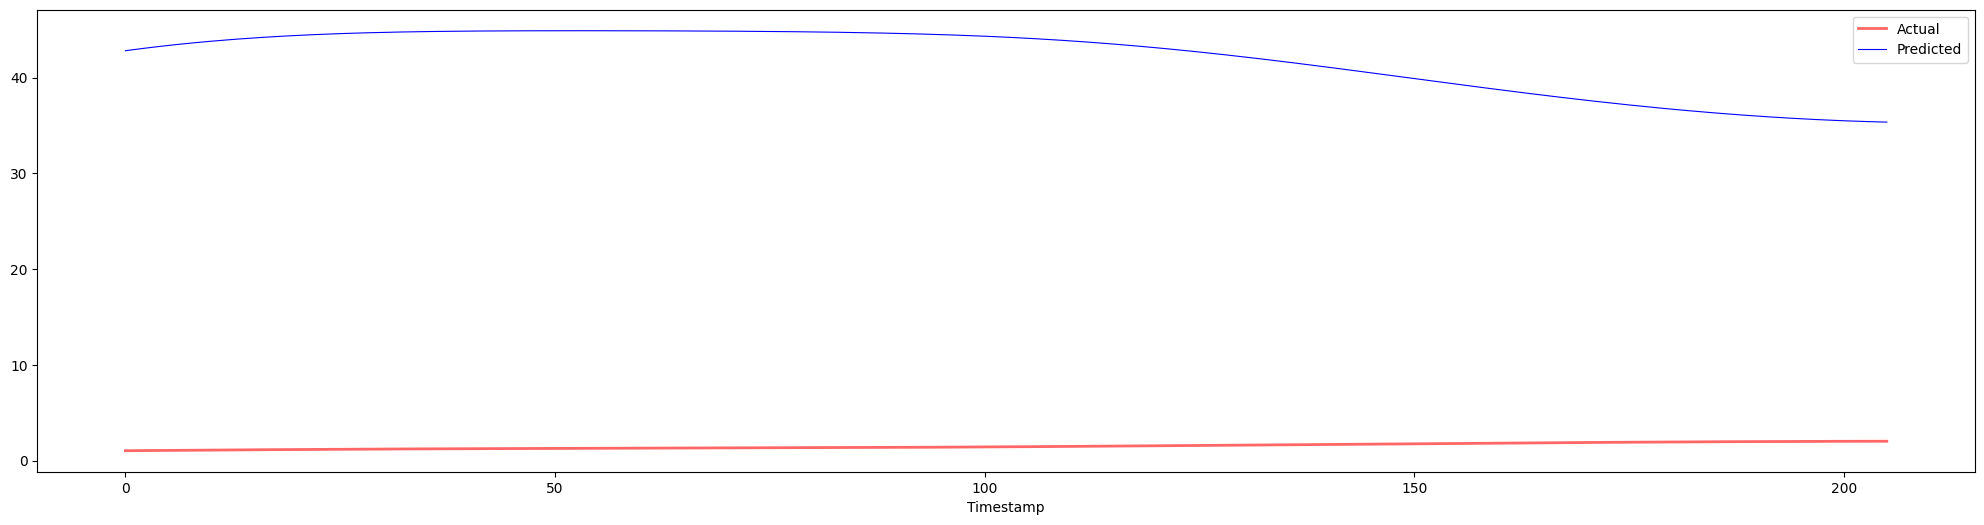

Tensor shape:  (832, 3)
X shape:  (832, 2) 
Y shape:  (832, 1)


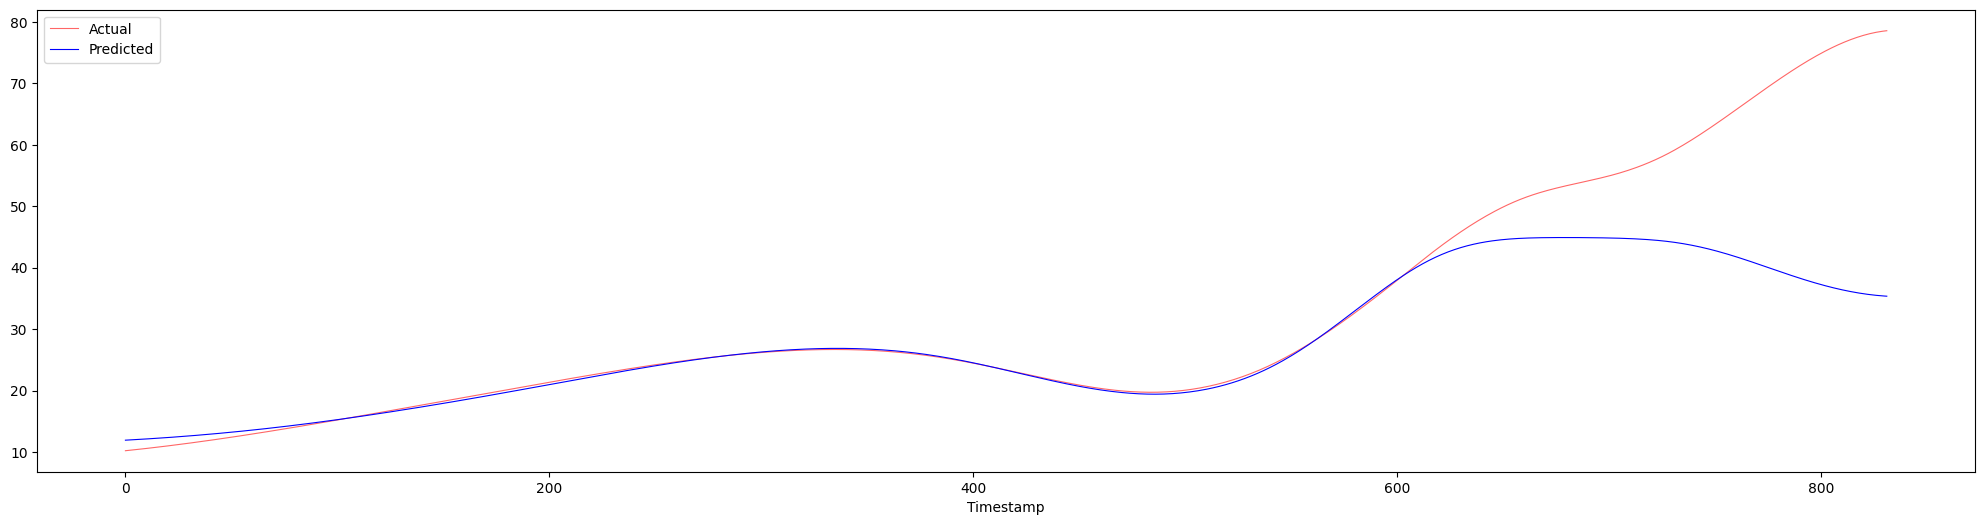

In [1293]:
df5[(df5.index <= test_start) & (df5.index >= train_start)][[5]].rename(columns={5:'train'}) \
    .join(df5[test_start:][[5]].rename(columns={5:'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('imf1', fontsize=12)
plt.show()

train = df5.copy()[(df5.index >= train_start) & (df5.index < test_start)][[5]]
test = df5.copy()[df5.index >= test_start][[5]]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train[5] = scaler.fit_transform(train)
train.head(1)

df5[(df5.index >= train_start) & (df5.index < test_start)][[5]].rename(columns={5:'original imf'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={5:'scaled imf'}).plot.hist(bins=100, fontsize=12)
plt.show()

test[5] = scaler.transform(test)
test.head()

# Specify the number of steps to forecast ahead
timesteps = 3
train_data = train.values
test_data = test.values
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(1,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Extracting load values as numpy array
data = df5.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(25,6))
plt.plot(Y, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

df5 = df5.iloc[2:]
df5["Pred imf6"] = Y_pred

# imf7

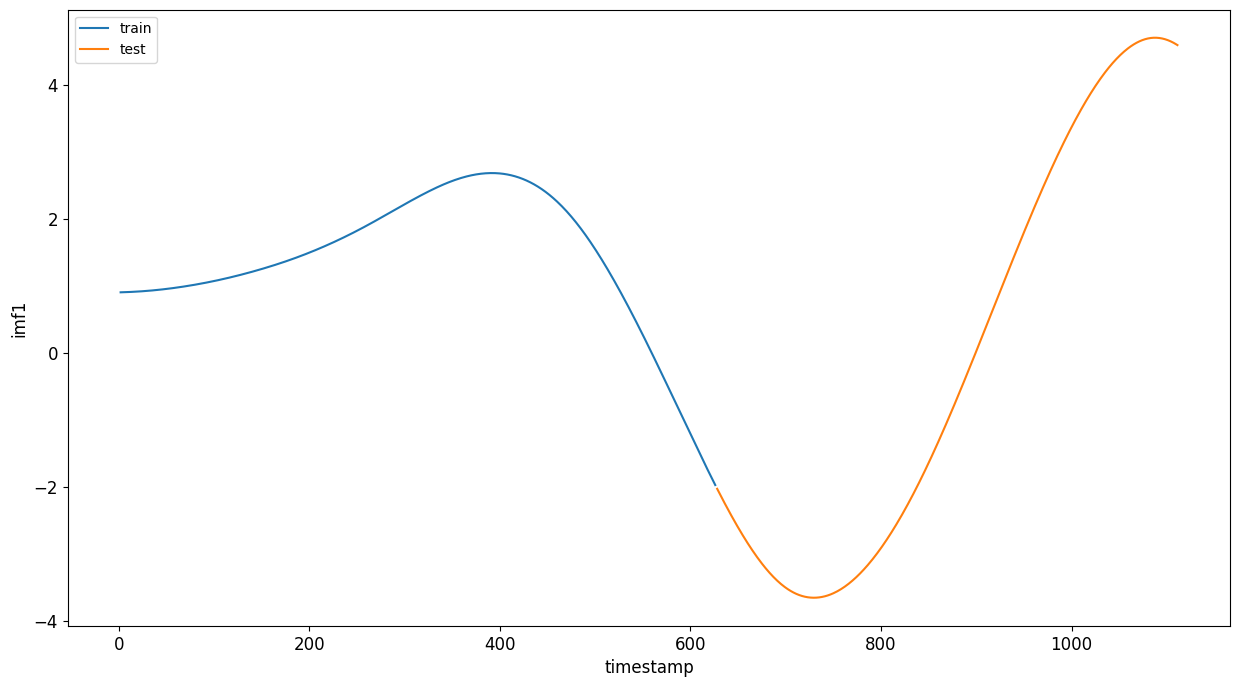

Training data shape:  (624, 1)
Test data shape:  (486, 1)


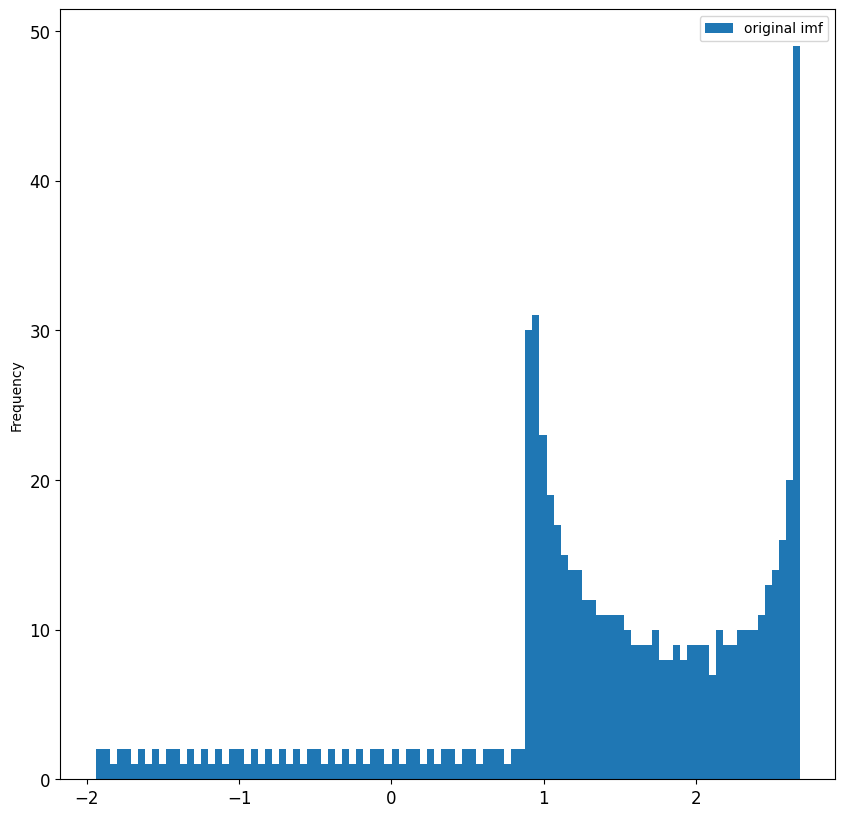

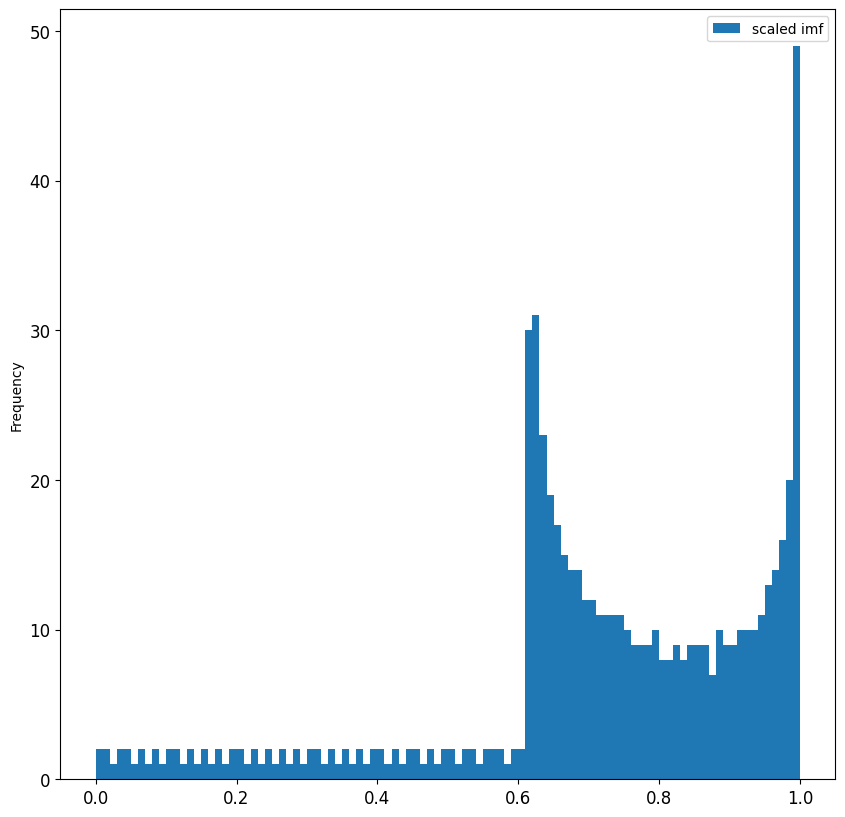

(621, 2) (621, 1)
(484, 2) (484, 1)
(621, 1) (484, 1)
621 484


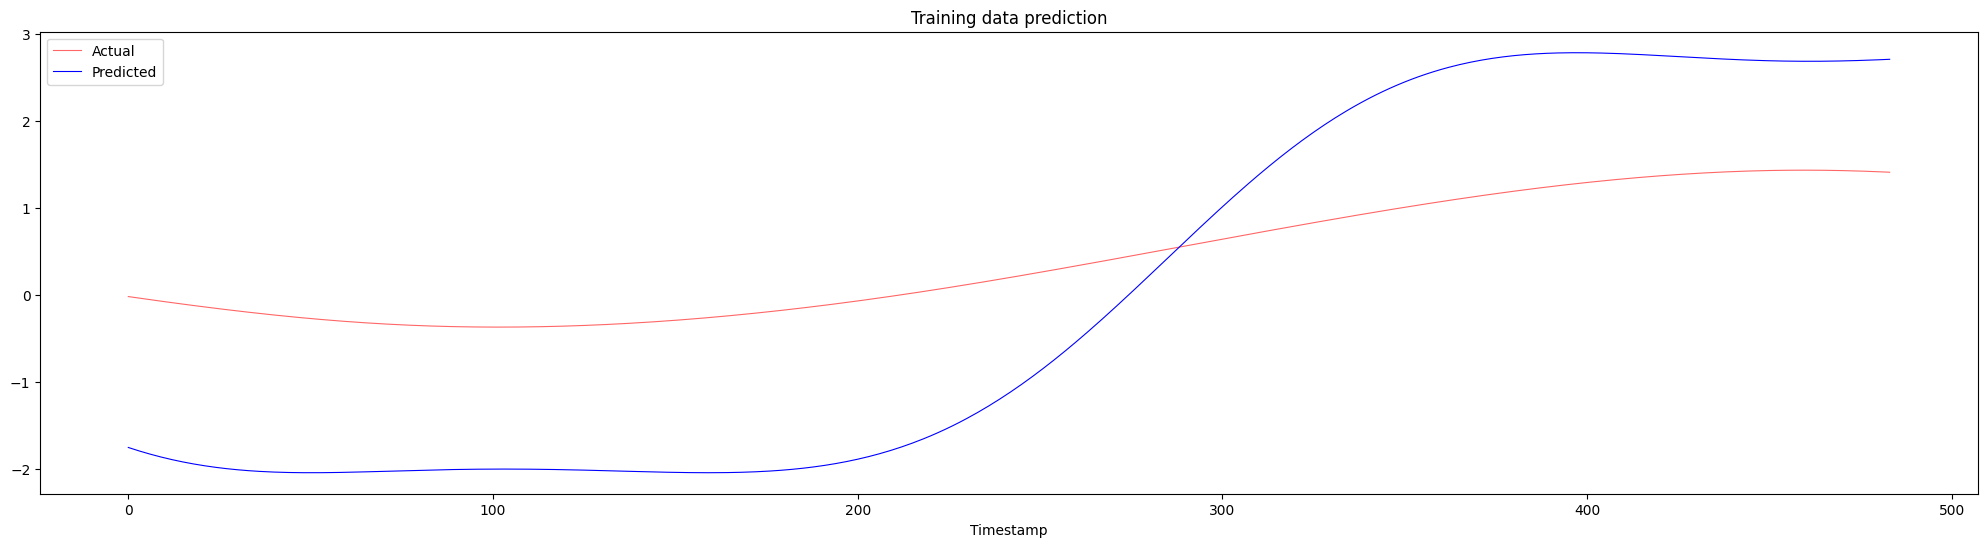

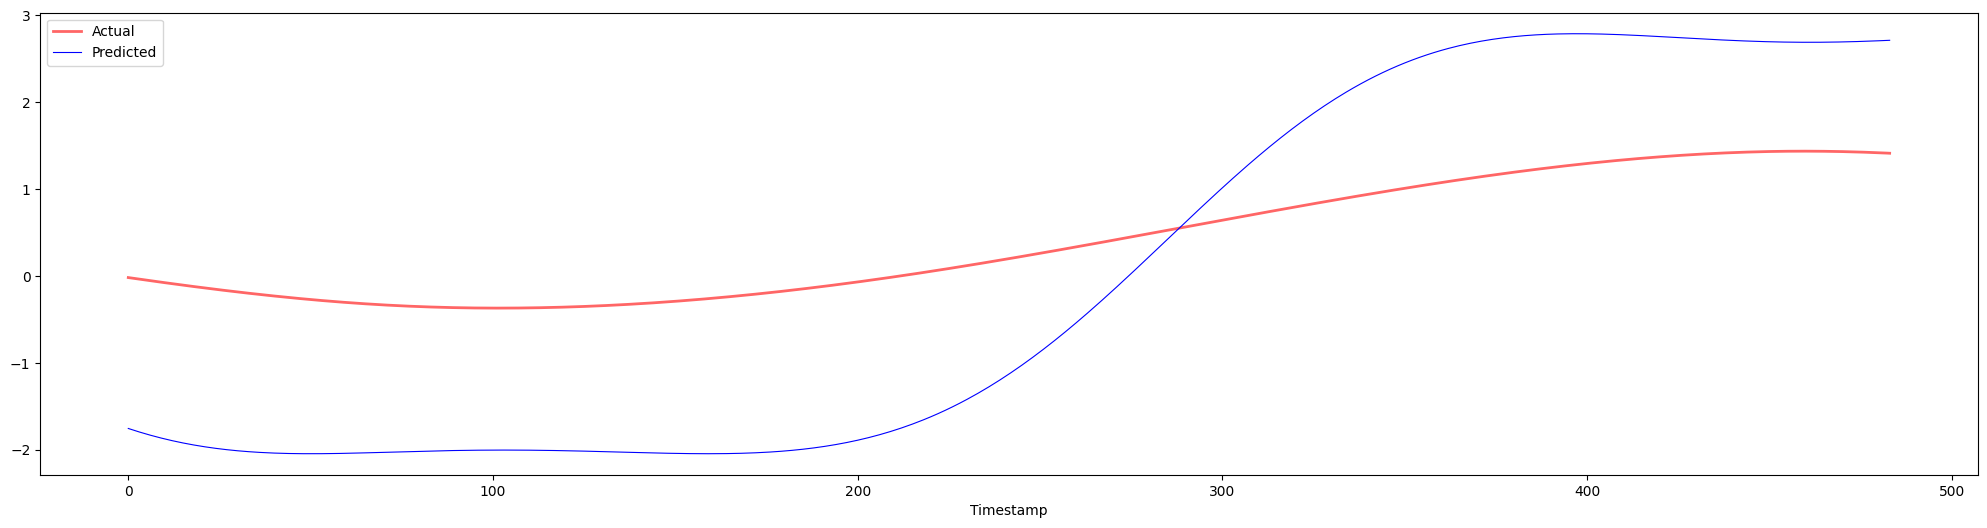

ValueError: X has 2 features, but MinMaxScaler is expecting 1 features as input.

In [1294]:
df6[(df6.index <= test_start) & (df6.index >= train_start)][[6]].rename(columns={6:'train'}) \
    .join(df6[test_start:][[6]].rename(columns={6:'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('imf1', fontsize=12)
plt.show()

train = df6.copy()[(df6.index >= train_start) & (df6.index < test_start)][[6]]
test = df6.copy()[df6.index >= test_start][[6]]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train[6] = scaler.fit_transform(train)
train.head(1)

df6[(df6.index >= train_start) & (df6.index < test_start)][[6]].rename(columns={6:'original imf'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={6:'scaled imf'}).plot.hist(bins=100, fontsize=12)
plt.show()

test[6] = scaler.transform(test)
test.head()

# Specify the number of steps to forecast ahead
timesteps = 3
train_data = train.values
test_data = test.values
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(1,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

plt.figure(figsize=(25,6))
plt.plot( y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

# Extracting load values as numpy array
data = df6.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(25,6))
plt.plot(Y, color = 'red', linewidth=0.8, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

df6 = df6.iloc[2:]
df6["Pred imf7"] = Y_pred

In [1295]:
new_df = pd.DataFrame(df["Date"])
new_df = new_df.iloc[2:]
df = df.iloc[2:]

In [1296]:
new_df["pred imf1"] = df0["Pred imf1"]
new_df["pred imf2"] = df1["Pred imf2"]
new_df["pred imf3"] = df2["Pred imf3"]
new_df["pred imf4"] = df3["Pred imf4"]
new_df["pred imf5"] = df4["Pred imf5"]
new_df["pred imf6"] = df5["Pred imf6"]
#new_df["pred imf7"] = df6["Pred imf7"]

In [1297]:
new_df["Pred"] = new_df.sum(axis=1)
new_df.head()

C:\Users\rafir\AppData\Local\Temp\ipykernel_7932\1595964438.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df["Pred"] = new_df.sum(axis=1)


,Date,pred imf1,pred imf2,pred imf3,pred imf4,pred imf5,pred imf6,Pred
2,2018-01-11,0.019611,0.099251,-0.512077,-0.056534,-1.785275,11.921485,9.686460
3,2018-01-12,-0.018848,0.020483,-0.473098,-0.061462,-1.795709,11.940333,9.611699
4,2018-01-15,-0.056552,-0.051242,-0.401963,-0.055638,-1.804208,11.959452,9.589848
5,2018-01-16,0.032339,-0.100558,-0.307687,-0.040807,-1.810850,11.978843,9.751280
6,2018-01-17,0.093234,-0.121863,-0.197462,-0.018810,-1.815719,11.998510,9.937889


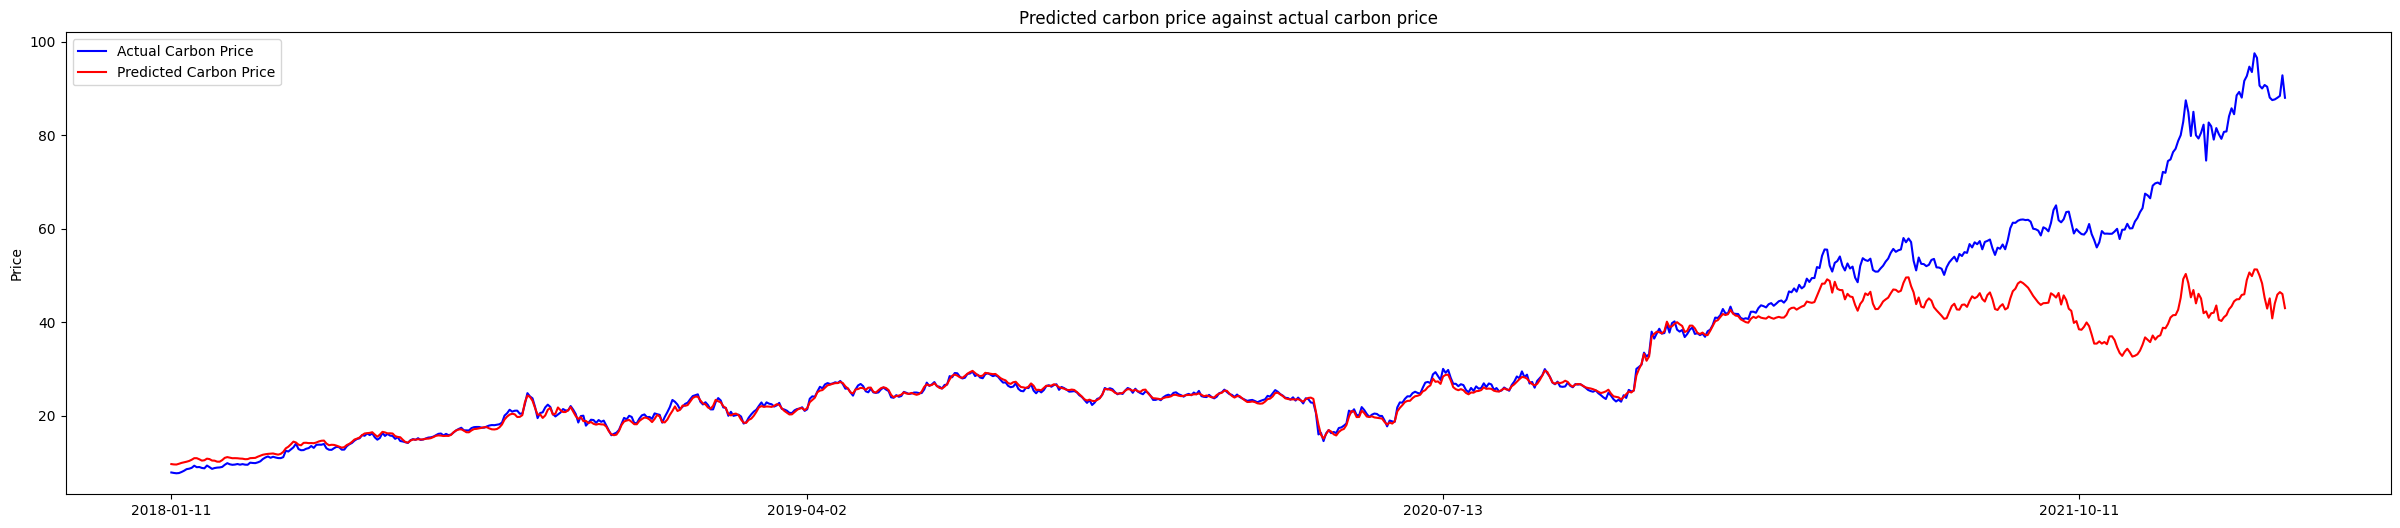

In [1298]:
plt.figure(figsize=(30,6))
plt.plot(new_df["Date"], df["Carbon Price"], label = 'Actual Carbon Price', color = "blue")
plt.plot(new_df["Date"],  new_df["Pred"], label ='Predicted Carbon Price', color = "red", linestyle = "-")

plt.title("Predicted carbon price against actual carbon price")
plt.ylabel("Price")
plt.legend()
plt.xticks([0,250, 500,750,])
plt.savefig("FullModel.png")
plt.show() 

In [1299]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
print('mean_squared_error : ', mean_squared_error( df["Carbon Price"],new_df["Pred"]+6))
print('mean_absolute_error : ', mean_absolute_error( df["Carbon Price"],new_df["Pred"]+6))
print("root_mean_squared_error: ", np.sqrt(mean_squared_error( df["Carbon Price"],new_df["Pred"]+6)))
print("R^2: " ,r2_score( df["Carbon Price"],new_df["Pred"]))

mean_squared_error :  117.03079641088604
mean_absolute_error :  7.950043261168828
root_mean_squared_error:  10.81807729732442
R^2:  0.6323326561620319


In [1300]:
# # Create an LSSVR model for each IMF
# models = []
# for imf in imfs.T:
#     model = LinearSVR(C=1, epsilon=0.1)
#     models.append(model)



In [1301]:
# # Split the IMF data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df["Carbon Price"], df["Date"], test_size=0.2)

# # Train the LSSVR models on the training data for each IMF
# for model, X, y in zip(models, X_train, y_train):
#     model.fit(X, y)

# # Make predictions on the test data for each IMF
# predictions = []
# for model, X in zip(models, X_test):
#     predictions.append(model.predict(X))

# # Sum the predictions from all the IMFs to obtain the final forecast for the carbon price time series
# final_predictions = sum(predictions)

# # Evaluate the performance of the hybrid model on the test data
# print(mean_squared_error(y_test, final_predictions))
